# Project Exploration

### Kha-Ai Tran

In [1]:
#Foundational libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import geopandas as gpd
import cenpy as cen
import matplotlib.pyplot as plt
import matplotlib as mpl
import shapely
import seaborn as sns
%matplotlib inline

#Needed for spatial statistics
import libpysal.weights as sw #spatial weights
from esda.moran import Moran, Moran_Local #global & local Moran's I
import spreg #spatial regression module
from mgwr.gwr import GWR, MGWR #GWR & MGWR constructors
from mgwr.sel_bw import Sel_BW #bandwidth selection constructor
from mgwr.utils import compare_surfaces, truncate_colormap, shift_colormap
from splot.esda import lisa_cluster, plot_local_autocorrelation

pd.options.display.max_rows = 50

/opt/conda/lib/python3.9/site-packages/cenpy/remote.py:224: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if index is not "":
/opt/conda/lib/python3.9/site-packages/cenpy/tiger.py:186: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if kwargs.get("returnGeometry", "true") is "false":
/opt/conda/lib/python3.9/site-packages/esda/getisord.py:636: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if __name__ is "__main__":
/opt/conda/lib/python3.9/site-packages/spglm/utils.py:367: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if resetlist is not ():


In [2]:
farms = pd.read_csv('../data/usda_indices_farm_output_input_total_factor_productivity_1948_2017.csv')
farms.head()

,Year,Category1,Category2,Amount
0,1948,Total output,Total output,0.359295
1,1948,Livestock and products,All livestock and products,0.437911
2,1948,Livestock and products,Meat animals,0.563465
3,1948,Livestock and products,Dairy,0.448529
4,1948,Livestock and products,Poultry and eggs,0.131924


In [3]:
farms = farms[farms['Year'] >= 1960]
farms

,Year,Category1,Category2,Amount
360,1960,Total output,Total output,0.430512
361,1960,Livestock and products,All livestock and products,0.533655
362,1960,Livestock and products,Meat animals,0.709398
363,1960,Livestock and products,Dairy,0.547841
364,1960,Livestock and products,Poultry and eggs,0.233898
...,...,...,...,...
2095,2017,Intermediate goods,Fertilizer and lime,1.054148
2096,2017,Intermediate goods,Pesticides,1.061644
2097,2017,Intermediate goods,Purchased services,1.027826
2098,2017,Intermediate goods,Other intermediate,0.920118


In [4]:
farms['Category1'].unique()

array(['Total output', 'Livestock and products', 'Crops',
       'Farm-related output', 'Total farm inputs', 'Capital', 'Labor',
       'Intermediate goods', 'Total factor productivity (TFP)'],
      dtype=object)

In [5]:
farms['Category2'].unique()

array(['Total output', 'All livestock and products', 'Meat animals',
       'Dairy', 'Poultry and eggs', 'All crops', 'Food grains',
       'Feed crops', 'Oil crops', 'Vegetables and melons',
       'Fruits and nuts', 'Other crops', 'Farm-related output',
       'Total farm inputs', 'All capital', 'Durable equipment',
       'Service buildings', 'Land', 'Inventories', 'All labor',
       'Hired labor', 'Self-employed and unpaid family',
       'All intermediate goods', 'Feed and seed', 'Energy',
       'Fertilizer and lime', 'Pesticides', 'Purchased services',
       'Other intermediate', 'Total factor productivity (TFP)'],
      dtype=object)

In [6]:
farms=farms[farms["Category1"].str.contains("Total")==False]
farms

,Year,Category1,Category2,Amount
361,1960,Livestock and products,All livestock and products,0.533655
362,1960,Livestock and products,Meat animals,0.709398
363,1960,Livestock and products,Dairy,0.547841
364,1960,Livestock and products,Poultry and eggs,0.233898
365,1960,Crops,All crops,0.390497
...,...,...,...,...
2094,2017,Intermediate goods,Energy,0.959279
2095,2017,Intermediate goods,Fertilizer and lime,1.054148
2096,2017,Intermediate goods,Pesticides,1.061644
2097,2017,Intermediate goods,Purchased services,1.027826


In [7]:
farms_totals=farms[farms['Category2'].str.contains("All")==True]
farms_totals

,Year,Category1,Category2,Amount
361,1960,Livestock and products,All livestock and products,0.533655
365,1960,Crops,All crops,0.390497
374,1960,Capital,All capital,1.206107
379,1960,Labor,All labor,2.502950
382,1960,Intermediate goods,All intermediate goods,0.572199
...,...,...,...,...
2071,2017,Livestock and products,All livestock and products,1.053798
2075,2017,Crops,All crops,1.026259
2084,2017,Capital,All capital,0.986924
2089,2017,Labor,All labor,0.962226


In [8]:
farms=farms[farms["Category2"].str.contains("All")==False]
farms

,Year,Category1,Category2,Amount
362,1960,Livestock and products,Meat animals,0.709398
363,1960,Livestock and products,Dairy,0.547841
364,1960,Livestock and products,Poultry and eggs,0.233898
366,1960,Crops,Food grains,0.563863
367,1960,Crops,Feed crops,0.482751
...,...,...,...,...
2094,2017,Intermediate goods,Energy,0.959279
2095,2017,Intermediate goods,Fertilizer and lime,1.054148
2096,2017,Intermediate goods,Pesticides,1.061644
2097,2017,Intermediate goods,Purchased services,1.027826


In [9]:
farms['Category1'].unique()

array(['Livestock and products', 'Crops', 'Farm-related output',
       'Capital', 'Labor', 'Intermediate goods'], dtype=object)

In [10]:
farms_group = farms.groupby(['Year', 'Category1']).agg({'Amount': sum}).reset_index()

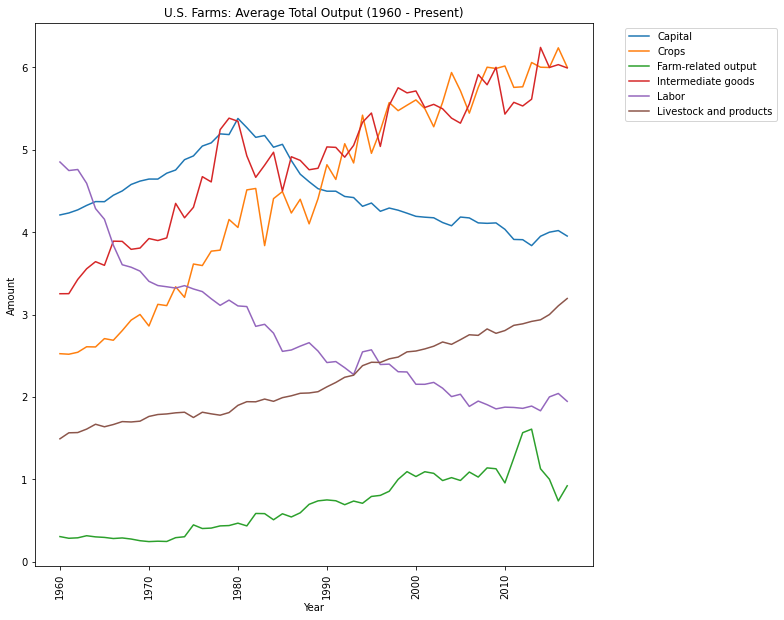

In [11]:
#fig, ax = plt.subplots(figsize=(10,10))

plt.figure(figsize=(10, 10))
sns.lineplot(x='Year', y='Amount', data=farms_group, hue='Category1')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title('U.S. Farms: Average Total Output (1960 - Present)')
plt.show()

#farms_group.plot(x='Year',
#           y='Amount',
#           ax=ax
#          )


#plt.show()

In [12]:
crops = pd.read_excel('../data/usda_state_crop_output.xls', header=5)
crops.head()

,Year,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960,0.863020,1.314405,0.875944,7.509311,1.102172,0.215666,0.123330,1.945921,1.163326,...,1.449408,1.130223,4.025687,0.222890,1.052029,0.157945,1.344930,1.957167,0.186453,0.209497
3,1961,0.816691,1.349605,0.915370,7.343501,1.062330,0.212578,0.119244,2.152937,1.233699,...,1.159234,1.179595,3.932670,0.209571,1.089893,0.162998,1.348380,2.097352,0.183341,0.226525
4,1962,0.738305,1.394829,0.894125,7.728201,0.954135,0.209983,0.113501,2.467778,1.128436,...,1.365035,1.099682,3.671237,0.243141,1.126861,0.154980,1.462482,2.154249,0.172485,0.226393


In [13]:
crops=crops.dropna()
crops

,Year,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2,1960,0.863020,1.314405,0.875944,7.509311,1.102172,0.215666,0.123330,1.945921,1.163326,...,1.449408,1.130223,4.025687,0.222890,1.052029,0.157945,1.344930,1.957167,0.186453,0.209497
3,1961,0.816691,1.349605,0.915370,7.343501,1.062330,0.212578,0.119244,2.152937,1.233699,...,1.159234,1.179595,3.932670,0.209571,1.089893,0.162998,1.348380,2.097352,0.183341,0.226525
4,1962,0.738305,1.394829,0.894125,7.728201,0.954135,0.209983,0.113501,2.467778,1.128436,...,1.365035,1.099682,3.671237,0.243141,1.126861,0.154980,1.462482,2.154249,0.172485,0.226393
5,1963,0.935998,1.456042,0.968581,7.886969,0.831364,0.218605,0.109854,2.010038,1.386955,...,1.417146,1.213836,4.090695,0.237186,0.879029,0.151962,1.598017,1.968646,0.162256,0.254502
6,1964,0.897049,1.527136,0.866725,8.307314,0.837551,0.211611,0.098910,1.956158,1.270681,...,1.154879,1.321503,3.797986,0.234716,1.031948,0.146725,1.663164,1.903562,0.163224,0.242913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,1973-79,6.016823,3.529687,5.164850,4.731929,3.632457,2.132750,2.578253,2.799821,4.033908,...,3.161453,4.002326,1.983880,3.635694,0.316761,2.523454,4.817531,5.111077,-2.086858,1.943745
56,1979-81,9.261720,4.303489,5.510485,3.456506,3.980310,-5.754362,-2.756580,3.997712,-0.058333,...,-1.341701,6.500423,0.486462,2.911569,5.552920,2.381916,8.948738,3.052310,0.543838,4.617399
57,1981-90,-5.536713,0.168547,-2.610574,2.075544,0.763145,2.759017,3.081671,0.904875,-2.008736,...,2.817128,-1.098648,-1.788194,-0.374451,0.011784,-1.066374,2.094235,-0.083751,1.920993,-0.147566
58,1990-2000,-0.508991,1.199811,3.301914,2.312445,1.482687,3.382866,1.645111,2.486331,3.342180,...,4.114096,0.919690,0.265719,1.884094,0.632065,-1.421405,1.936939,0.722594,0.789888,0.191076


In [14]:
crops.tail(15)

,Year,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
41,1999,0.945225,3.128073,1.639767,20.852382,2.320511,0.281211,0.209848,5.781125,2.458056,...,4.263340,1.703972,7.077335,0.465342,1.211118,0.141490,4.525952,3.815473,0.159613,0.446254
42,2000,0.763403,2.859711,1.592129,22.039649,2.114670,0.326116,0.263059,6.102425,2.415683,...,4.350897,1.769697,5.316817,0.454637,1.374931,0.138423,4.588659,3.635645,0.209133,0.376173
43,2001,1.056083,3.300092,1.590440,21.278075,2.171840,0.287631,0.240448,6.020311,2.612800,...,4.039610,1.929036,5.997978,0.432824,1.345522,0.132935,4.489165,3.412757,0.199206,0.330989
44,2002,0.911699,3.326949,1.594406,22.996301,1.744101,0.309841,0.193805,5.688204,2.367527,...,3.037921,1.879152,6.458924,0.389753,1.186811,0.149296,4.320466,3.726374,0.197941,0.270746
45,2003,1.263035,3.803692,1.754357,22.225773,1.910930,0.291516,0.206023,5.687548,2.797096,...,3.884222,2.244980,6.661352,0.426307,1.328496,0.152133,4.398508,3.509442,0.205566,0.374374
46,2004,1.125317,3.608902,1.676865,22.716083,1.957250,0.306903,0.253655,5.953664,2.522851,...,4.502679,2.024221,7.062683,0.433164,1.431585,0.146873,4.551983,3.493665,0.211507,0.345135
51,1960-2004,0.603142,2.295499,1.475863,2.515749,1.305130,0.801817,1.638883,2.541526,1.759332,...,2.576175,1.324477,1.277567,1.510090,0.700140,-0.165186,2.770958,1.316939,0.286549,1.134611
52,1960-66,-3.422061,0.980051,0.378510,2.234830,-1.916480,0.023651,-3.975255,4.121260,-0.278839,...,-0.843636,-0.846891,1.006934,1.164083,-2.165615,0.119409,4.639681,1.988423,-7.109052,1.364202
53,1966-69,0.619256,5.987575,3.105513,2.305288,5.341445,-3.966248,13.218201,4.462648,2.101047,...,5.041082,1.249857,-2.063079,4.097253,5.304769,-2.765053,1.647264,0.473175,9.800194,7.395162
54,1969-73,1.676341,2.647625,-0.842275,2.559041,2.296394,-1.709603,1.451458,4.594513,7.252451,...,4.270201,2.461819,7.131480,2.224432,1.103642,-0.427057,1.231140,1.333881,2.744664,1.670884


In [15]:
crops_agg=crops.tail(9)
crops_agg

,Year,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
51,1960-2004,0.603142,2.295499,1.475863,2.515749,1.305130,0.801817,1.638883,2.541526,1.759332,...,2.576175,1.324477,1.277567,1.510090,0.700140,-0.165186,2.770958,1.316939,0.286549,1.134611
52,1960-66,-3.422061,0.980051,0.378510,2.234830,-1.916480,0.023651,-3.975255,4.121260,-0.278839,...,-0.843636,-0.846891,1.006934,1.164083,-2.165615,0.119409,4.639681,1.988423,-7.109052,1.364202
53,1966-69,0.619256,5.987575,3.105513,2.305288,5.341445,-3.966248,13.218201,4.462648,2.101047,...,5.041082,1.249857,-2.063079,4.097253,5.304769,-2.765053,1.647264,0.473175,9.800194,7.395162
54,1969-73,1.676341,2.647625,-0.842275,2.559041,2.296394,-1.709603,1.451458,4.594513,7.252451,...,4.270201,2.461819,7.131480,2.224432,1.103642,-0.427057,1.231140,1.333881,2.744664,1.670884
55,1973-79,6.016823,3.529687,5.164850,4.731929,3.632457,2.132750,2.578253,2.799821,4.033908,...,3.161453,4.002326,1.983880,3.635694,0.316761,2.523454,4.817531,5.111077,-2.086858,1.943745
56,1979-81,9.261720,4.303489,5.510485,3.456506,3.980310,-5.754362,-2.756580,3.997712,-0.058333,...,-1.341701,6.500423,0.486462,2.911569,5.552920,2.381916,8.948738,3.052310,0.543838,4.617399
57,1981-90,-5.536713,0.168547,-2.610574,2.075544,0.763145,2.759017,3.081671,0.904875,-2.008736,...,2.817128,-1.098648,-1.788194,-0.374451,0.011784,-1.066374,2.094235,-0.083751,1.920993,-0.147566
58,1990-2000,-0.508991,1.199811,3.301914,2.312445,1.482687,3.382866,1.645111,2.486331,3.342180,...,4.114096,0.919690,0.265719,1.884094,0.632065,-1.421405,1.936939,0.722594,0.789888,0.191076
59,2000-04,9.700859,5.817071,1.296355,0.755753,-1.933957,-1.518100,-0.910138,-0.616986,1.085190,...,0.857260,3.359404,7.098751,-1.209552,1.009466,1.481402,-0.200618,-0.995882,0.282222,-2.152824


In [16]:
crops=crops.head(45)
crops

,Year,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2,1960,0.863020,1.314405,0.875944,7.509311,1.102172,0.215666,0.123330,1.945921,1.163326,...,1.449408,1.130223,4.025687,0.222890,1.052029,0.157945,1.344930,1.957167,0.186453,0.209497
3,1961,0.816691,1.349605,0.915370,7.343501,1.062330,0.212578,0.119244,2.152937,1.233699,...,1.159234,1.179595,3.932670,0.209571,1.089893,0.162998,1.348380,2.097352,0.183341,0.226525
4,1962,0.738305,1.394829,0.894125,7.728201,0.954135,0.209983,0.113501,2.467778,1.128436,...,1.365035,1.099682,3.671237,0.243141,1.126861,0.154980,1.462482,2.154249,0.172485,0.226393
5,1963,0.935998,1.456042,0.968581,7.886969,0.831364,0.218605,0.109854,2.010038,1.386955,...,1.417146,1.213836,4.090695,0.237186,0.879029,0.151962,1.598017,1.968646,0.162256,0.254502
6,1964,0.897049,1.527136,0.866725,8.307314,0.837551,0.211611,0.098910,1.956158,1.270681,...,1.154879,1.321503,3.797986,0.234716,1.031948,0.146725,1.663164,1.903562,0.163224,0.242913
7,1965,0.921270,1.675313,0.926343,8.005043,0.818390,0.215163,0.136545,2.329985,1.348143,...,1.381165,1.261282,4.283360,0.252319,1.026239,0.132018,1.635818,2.044990,0.152710,0.220157
8,1966,0.702829,1.394014,0.896064,8.586863,0.982450,0.215972,0.097159,2.491814,1.144025,...,1.377868,1.074227,4.276401,0.239014,0.923840,0.159081,1.776637,2.205167,0.121709,0.227366
9,1967,0.616542,1.300783,0.851608,7.718895,0.928733,0.207115,0.149960,2.937796,1.399310,...,1.565086,0.998592,3.779990,0.283692,1.047327,0.156770,1.935799,2.221714,0.165703,0.298910
10,1968,0.660685,1.596347,0.894460,8.883205,1.050997,0.191068,0.116327,2.458111,1.214029,...,1.620280,1.034629,4.265132,0.267712,1.032268,0.145351,1.833613,2.388968,0.160302,0.288325
11,1969,0.716008,1.668315,0.983559,9.201735,1.153197,0.191744,0.144445,2.848779,1.218456,...,1.602828,1.115271,4.019748,0.270275,1.083208,0.146417,1.866641,2.236693,0.163308,0.283841


In [2]:
invasive = gpd.read_file('../data/Current_Invasive_Plants/Current_Invasive_Plants.shp')

In [8]:
invasive

,OBJECTID,SITE_ID_FS,ACCEPTED_P,ACCEPTED_S,ACCEPTED_C,DATE_COLLE,TOTAL_AREA,INFESTED_A,INFESTED_P,FS_UNIT_NA,CRC_VALUE,geometry
0,1240939,TNF-TBRD_2083_013_CEFO2,CEFO2,Cerastium fontanum,common mouse-ear chickweed,2005-09-07,0.0007,0.0007,100,TONGASS NATIONAL FOREST,F864BA4A97F02DC2,"POLYGON ((-14852207.277 7577683.116, -14852208..."
1,1240940,0419062008PDR40416,CIAR4,Cirsium arvense,Canada thistle,2008-07-08,0.0681,0.0511,75,UINTA-WASATCH-CACHE NATIONAL FOREST,B26E9AB692FFD55B,"POLYGON ((-12407039.708 5062929.364, -12407043..."
2,1240941,0419062008PDR40191,ISTI,Isatis tinctoria,Dyer's woad,2008-06-23,0.4465,0.2233,50,UINTA-WASATCH-CACHE NATIONAL FOREST,1C3C9199A5349559,"POLYGON ((-12417866.864 5030147.710, -12417869..."
3,1240942,0419062008PDR40207,CIAR4,Cirsium arvense,Canada thistle,2008-06-24,0.3981,0.2986,75,UINTA-WASATCH-CACHE NATIONAL FOREST,57980AA78DBFF2A8,"POLYGON ((-12448459.018 5027569.961, -12448462..."
4,1240943,0419062008PDR40436,CYOF,Cynoglossum officinale,gypsyflower,2008-07-09,0.0013,0.0001,10,UINTA-WASATCH-CACHE NATIONAL FOREST,0FCAD722FC18D83E,"POLYGON ((-12456378.510 5030910.451, -12456379..."
...,...,...,...,...,...,...,...,...,...,...,...,...
812525,2309401,0620030700,CIAR4,Cirsium arvense,Canada thistle,2021-09-23,0.0192,0.0000,0,FREMONT-WINEMA NATIONAL FORESTS,52F782269140B6DE,"POLYGON ((-13600609.069 5197658.434, -13600598..."
812526,2309402,041203_21_TRTE_BM_01,TRTE,Tribulus terrestris,puncturevine,2021-09-21,0.3414,0.3414,100,PAYETTE NATIONAL FOREST,09C2F5AA8333597B,"POLYGON ((-12942922.385 5619224.948, -12942897..."
812527,2309403,CATH-305D,CANU4,Carduus nutans,nodding plumeless thistle,2021-06-15,2.8920,2.8920,100,ASHLEY NATIONAL FOREST,FA3A40605B7B74B6,"POLYGON ((-12302679.689 4829502.189, -12302754..."
812528,2309404,010406310VETH2019RD1066,VETH,Verbascum thapsus,common mullein,2021-06-01,19.3486,19.3486,100,IDAHO PANHANDLE NATIONAL FORESTS,D850E4DCC2ECAC9F,"POLYGON ((-12945387.667 6091368.271, -12945388..."


In [3]:
invasive.columns

Index(['OBJECTID', 'SITE_ID_FS', 'ACCEPTED_P', 'ACCEPTED_S', 'ACCEPTED_C',
       'DATE_COLLE', 'TOTAL_AREA', 'INFESTED_A', 'INFESTED_P', 'FS_UNIT_NA',
       'CRC_VALUE', 'geometry'],
      dtype='object')

In [6]:
invasive.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [7]:
invasive = invasive.to_crs(epsg=3395)

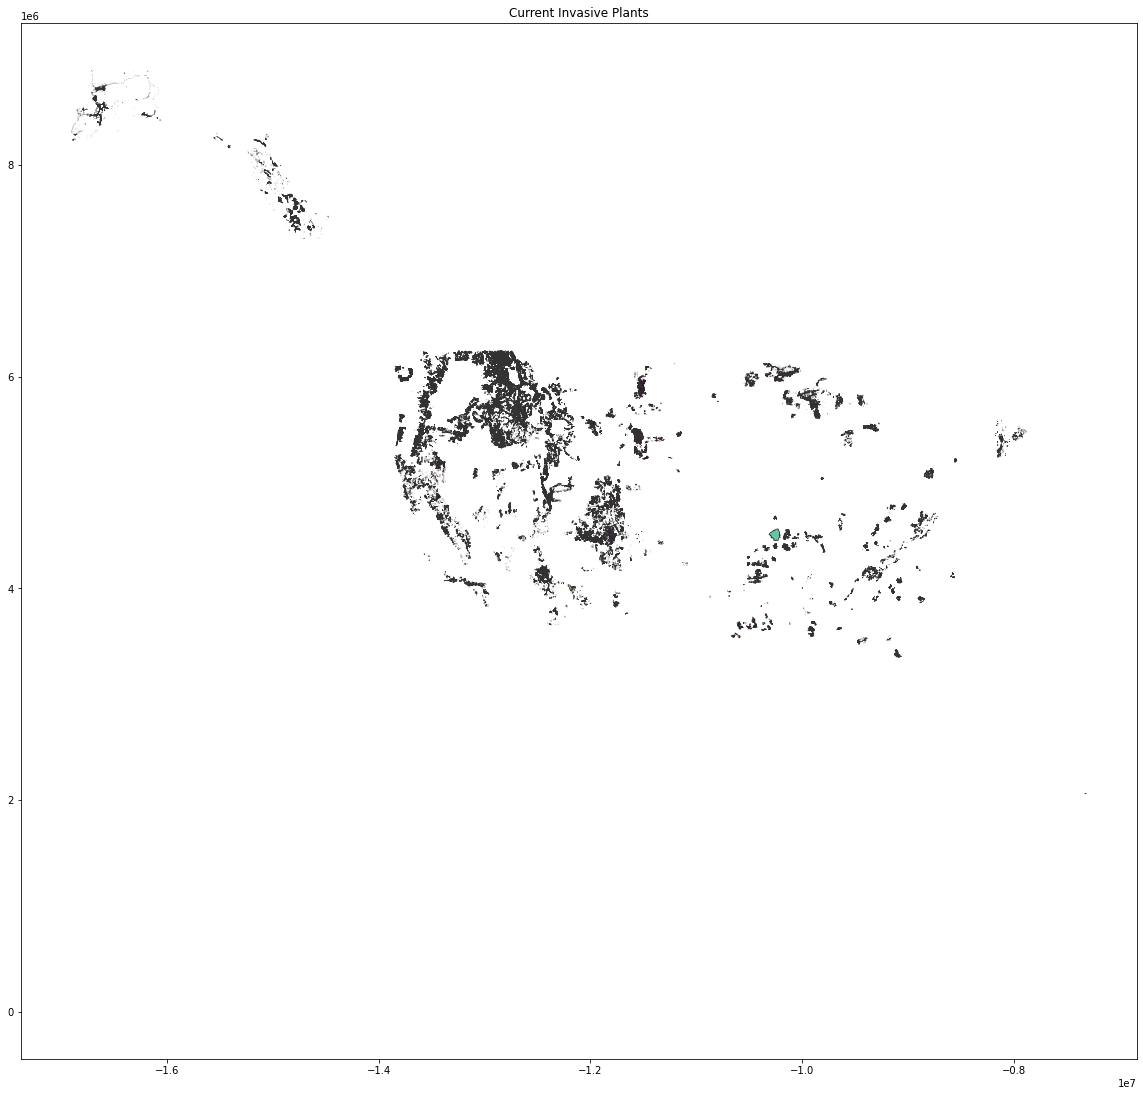

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
invasive.plot(column='ACCEPTED_C', categorical=True, cmap='Spectral', linewidth=.6, edgecolor='0.2',
         legend=False, legend_kwds={'bbox_to_anchor':(1, .42),'fontsize':12}, ax=ax)

ax.set(title='Current Invasive Plants')
plt.show()

In [54]:
globaltemp = pd.read_csv('../data/GlobalLandTemperaturesByCity.csv')
globaltemp

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [55]:
globaltemp.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [56]:
# convert Date to datetime
globaltemp['dt']=pd.to_datetime(globaltemp['dt'],format='%Y-%m-%d')
globaltemp.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [70]:
# data is already monthly
# select years since 1960 only to align with other datasets (and temperature/climate data needs longer timescale for more robust analysis)

globaltemp_1960 = globaltemp[globaltemp['dt'].dt.year >= 1960]
globaltemp_1960

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
2594,1960-01-01,-0.657,0.319,Århus,Denmark,57.05N,10.33E
2595,1960-02-01,-1.359,0.366,Århus,Denmark,57.05N,10.33E
2596,1960-03-01,2.339,0.360,Århus,Denmark,57.05N,10.33E
2597,1960-04-01,5.919,0.171,Århus,Denmark,57.05N,10.33E
2598,1960-05-01,12.214,0.334,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [71]:
# select global temp data for united states only

globaltemp_1960 = globaltemp_1960[globaltemp_1960['Country'] == 'United States']
globaltemp_1960

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
49235,1960-01-01,5.243,0.300,Abilene,United States,32.95N,100.53W
49236,1960-02-01,4.995,0.325,Abilene,United States,32.95N,100.53W
49237,1960-03-01,8.575,0.303,Abilene,United States,32.95N,100.53W
49238,1960-04-01,18.452,0.282,Abilene,United States,32.95N,100.53W
49239,1960-05-01,21.709,0.286,Abilene,United States,32.95N,100.53W
...,...,...,...,...,...,...,...
8439242,2013-05-01,15.544,0.281,Yonkers,United States,40.99N,74.56W
8439243,2013-06-01,20.892,0.273,Yonkers,United States,40.99N,74.56W
8439244,2013-07-01,24.722,0.279,Yonkers,United States,40.99N,74.56W
8439245,2013-08-01,21.001,0.323,Yonkers,United States,40.99N,74.56W


In [72]:
# reformat lat long
globaltemp_1960=globaltemp_1960.copy()
globaltemp_1960['Latitude']=globaltemp_1960['Latitude'].str.rstrip('N')
globaltemp_1960['Latitude']=globaltemp_1960['Latitude'].astype(float)
globaltemp_1960['Longitude']=globaltemp_1960['Longitude'].str.rstrip('W')
globaltemp_1960['Longitude']=globaltemp_1960['Longitude'].astype(float)
globaltemp_1960['Longitude']=globaltemp_1960['Longitude']*-1
globaltemp_1960

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
49235,1960-01-01,5.243,0.300,Abilene,United States,32.95,-100.53
49236,1960-02-01,4.995,0.325,Abilene,United States,32.95,-100.53
49237,1960-03-01,8.575,0.303,Abilene,United States,32.95,-100.53
49238,1960-04-01,18.452,0.282,Abilene,United States,32.95,-100.53
49239,1960-05-01,21.709,0.286,Abilene,United States,32.95,-100.53
...,...,...,...,...,...,...,...
8439242,2013-05-01,15.544,0.281,Yonkers,United States,40.99,-74.56
8439243,2013-06-01,20.892,0.273,Yonkers,United States,40.99,-74.56
8439244,2013-07-01,24.722,0.279,Yonkers,United States,40.99,-74.56
8439245,2013-08-01,21.001,0.323,Yonkers,United States,40.99,-74.56


In [73]:
globaltemp_1960.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                float64
Longitude                               float64
dtype: object

In [74]:
usatemp_gdf = gpd.GeoDataFrame(
    globaltemp_1960, geometry=gpd.points_from_xy(x=globaltemp_1960.Longitude, y=globaltemp_1960.Latitude)
)
usatemp_gdf

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,geometry
49235,1960-01-01,5.243,0.300,Abilene,United States,32.95,-100.53,POINT (-100.53000 32.95000)
49236,1960-02-01,4.995,0.325,Abilene,United States,32.95,-100.53,POINT (-100.53000 32.95000)
49237,1960-03-01,8.575,0.303,Abilene,United States,32.95,-100.53,POINT (-100.53000 32.95000)
49238,1960-04-01,18.452,0.282,Abilene,United States,32.95,-100.53,POINT (-100.53000 32.95000)
49239,1960-05-01,21.709,0.286,Abilene,United States,32.95,-100.53,POINT (-100.53000 32.95000)
...,...,...,...,...,...,...,...,...
8439242,2013-05-01,15.544,0.281,Yonkers,United States,40.99,-74.56,POINT (-74.56000 40.99000)
8439243,2013-06-01,20.892,0.273,Yonkers,United States,40.99,-74.56,POINT (-74.56000 40.99000)
8439244,2013-07-01,24.722,0.279,Yonkers,United States,40.99,-74.56,POINT (-74.56000 40.99000)
8439245,2013-08-01,21.001,0.323,Yonkers,United States,40.99,-74.56,POINT (-74.56000 40.99000)


In [75]:
usatemp_gdf = usatemp_gdf.set_crs(epsg=4326)

In [76]:
usatemp_gdf = usatemp_gdf.to_crs(epsg=3395)

In [130]:
statetemp = pd.read_csv('../data/GlobalLandTemperaturesByState.csv')
statetemp

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [131]:
# convert Date to datetime
statetemp['dt']=pd.to_datetime(statetemp['dt'],format='%Y-%m-%d')
statetemp.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
State                                    object
Country                                  object
dtype: object

In [132]:
# data is already monthly
# select years since 1960 only

statetemp_1960 = statetemp[statetemp['dt'].dt.year >= 1960]
statetemp_1960

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
1256,1960-01-01,26.454,0.337,Acre,Brazil
1257,1960-02-01,26.157,0.445,Acre,Brazil
1258,1960-03-01,26.418,0.316,Acre,Brazil
1259,1960-04-01,25.393,0.298,Acre,Brazil
1260,1960-05-01,24.852,0.278,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [133]:
# select global state temp data for united states only

statetemp_1960 = statetemp_1960[statetemp_1960['Country'] == 'United States']
statetemp_1960

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
10052,1960-01-01,7.173,0.219,Alabama,United States
10053,1960-02-01,7.022,0.221,Alabama,United States
10054,1960-03-01,7.631,0.099,Alabama,United States
10055,1960-04-01,17.858,0.239,Alabama,United States
10056,1960-05-01,20.071,0.305,Alabama,United States
...,...,...,...,...,...
626435,2013-05-01,10.607,0.208,Wyoming,United States
626436,2013-06-01,16.267,0.276,Wyoming,United States
626437,2013-07-01,20.222,0.133,Wyoming,United States
626438,2013-08-01,19.621,0.217,Wyoming,United States


In [134]:
statetemp_1960['Year'] = pd.DatetimeIndex(statetemp_1960['dt']).year
statetemp_1960['Month'] = pd.DatetimeIndex(statetemp_1960['dt']).month
statetemp_1960

/tmp/ipykernel_71/667730947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statetemp_1960['Year'] = pd.DatetimeIndex(statetemp_1960['dt']).year
/tmp/ipykernel_71/667730947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statetemp_1960['Month'] = pd.DatetimeIndex(statetemp_1960['dt']).month


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year,Month
10052,1960-01-01,7.173,0.219,Alabama,United States,1960,1
10053,1960-02-01,7.022,0.221,Alabama,United States,1960,2
10054,1960-03-01,7.631,0.099,Alabama,United States,1960,3
10055,1960-04-01,17.858,0.239,Alabama,United States,1960,4
10056,1960-05-01,20.071,0.305,Alabama,United States,1960,5
...,...,...,...,...,...,...,...
626435,2013-05-01,10.607,0.208,Wyoming,United States,2013,5
626436,2013-06-01,16.267,0.276,Wyoming,United States,2013,6
626437,2013-07-01,20.222,0.133,Wyoming,United States,2013,7
626438,2013-08-01,19.621,0.217,Wyoming,United States,2013,8


In [135]:
# make average annual temp
statetemp_grp = statetemp_1960.groupby(['Year', 'State'])['AverageTemperature'].mean().reset_index()
statetemp_grp

,Year,State,AverageTemperature
0,1960,Alabama,16.613667
1,1960,Alaska,-4.358917
2,1960,Arizona,15.537417
3,1960,Arkansas,15.133583
4,1960,California,14.671250
...,...,...,...
2749,2013,Virginia,14.731556
2750,2013,Washington,10.571778
2751,2013,West Virginia,13.029444
2752,2013,Wisconsin,8.085333


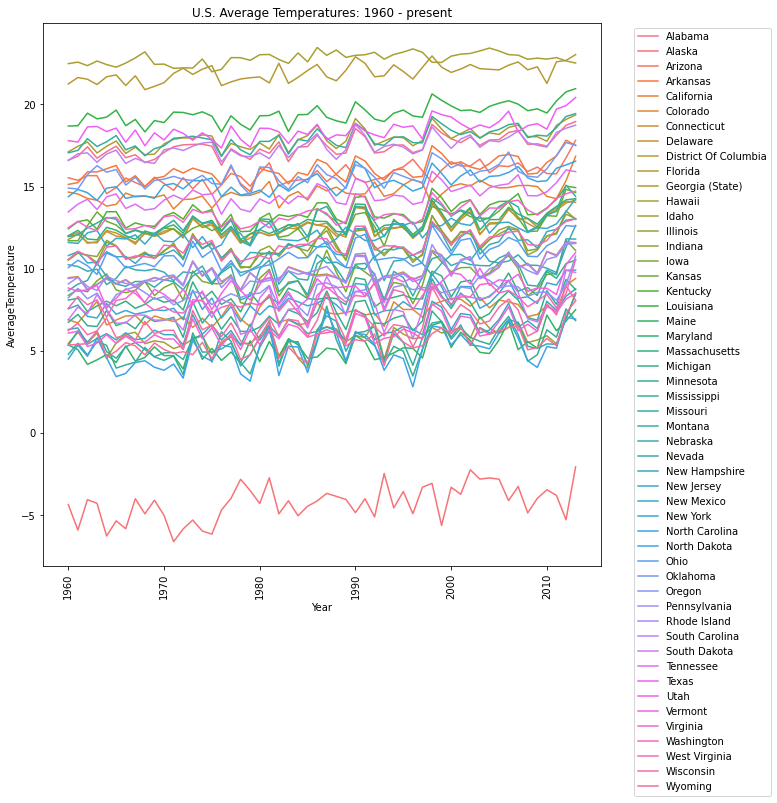

In [136]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='Year', y='AverageTemperature', data=statetemp_grp, hue='State')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title('U.S. Average Temperatures: 1960 - present')
plt.show()

In [81]:
statetemp_id = statetemp_1960[statetemp_1960['State'] == 'Idaho']
statetemp_id = statetemp_id.reset_index()
statetemp_id

,index,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,169637,1960-01-01,-8.276,0.362,Idaho,United States
1,169638,1960-02-01,-5.948,0.338,Idaho,United States
2,169639,1960-03-01,0.148,0.240,Idaho,United States
3,169640,1960-04-01,5.223,0.228,Idaho,United States
4,169641,1960-05-01,8.684,0.372,Idaho,United States
...,...,...,...,...,...,...
640,170277,2013-05-01,10.607,0.168,Idaho,United States
641,170278,2013-06-01,15.136,0.277,Idaho,United States
642,170279,2013-07-01,20.733,0.165,Idaho,United States
643,170280,2013-08-01,19.559,0.235,Idaho,United States


In [84]:
statetemp_id['Year'] = pd.DatetimeIndex(statetemp_id['dt']).year
statetemp_id['Month'] = pd.DatetimeIndex(statetemp_id['dt']).month
statetemp_id

,index,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year,Month
0,169637,1960-01-01,-8.276,0.362,Idaho,United States,1960,1
1,169638,1960-02-01,-5.948,0.338,Idaho,United States,1960,2
2,169639,1960-03-01,0.148,0.240,Idaho,United States,1960,3
3,169640,1960-04-01,5.223,0.228,Idaho,United States,1960,4
4,169641,1960-05-01,8.684,0.372,Idaho,United States,1960,5
...,...,...,...,...,...,...,...,...
640,170277,2013-05-01,10.607,0.168,Idaho,United States,2013,5
641,170278,2013-06-01,15.136,0.277,Idaho,United States,2013,6
642,170279,2013-07-01,20.733,0.165,Idaho,United States,2013,7
643,170280,2013-08-01,19.559,0.235,Idaho,United States,2013,8


In [85]:
# make average annual temp
statetemp_id_grp = statetemp_id.groupby(['Year'])['AverageTemperature'].mean().reset_index()
statetemp_id_grp

,Year,AverageTemperature
0,1960,5.452000
1,1961,6.128583
2,1962,5.520917
3,1963,6.082000
4,1964,4.547417
...,...,...
49,2009,5.664250
50,2010,5.920167
51,2011,5.425667
52,2012,6.955833


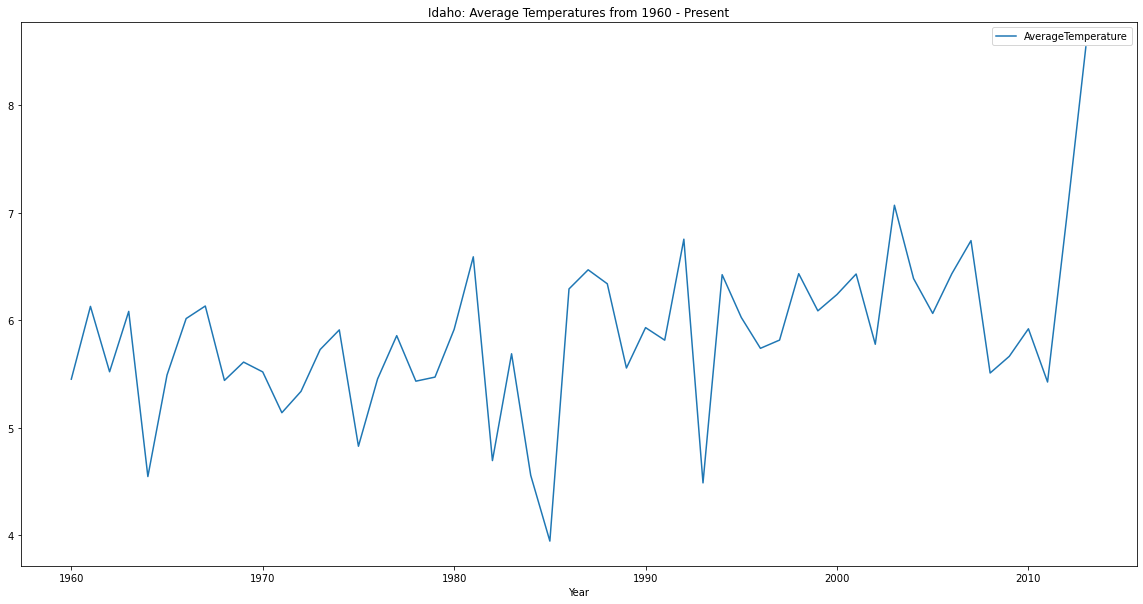

In [86]:
fig, ax = plt.subplots(figsize=(20,10))

statetemp_id_grp.plot(ax=ax,
                    x='Year',
                    y='AverageTemperature')

ax.set(title='Idaho: Average Temperatures from 1960 - Present')
plt.show()

In [87]:
eco = gpd.read_file('../data/Ecological_Provinces_(Feature_Layer).geojson')
eco

,MAP_TYPE,MAP_LEVEL,PROJECT,DOMAIN_NAME,DIVISION_NAME,MAP_UNIT_SYMBOL,MAP_UNIT_NAME,MAP_UNIT_DESCRIPTION,PROVINCE_,PROVINCE_ID,PERIMETER,ACRES,GIS_ACRES,GIS_MILES,OBJECTID,S_USAEcoMapProvincesAREA,SHAPEAREA,SHAPELEN,geometry
0,ECUN,PROV,ECOMAP07,Humid Temperate,Marine,242,Pacific Lowland Mixed Forest Province,"This province has a mild, modified marine clim...",1,1,4.442387e+06,7.915036e+06,7.915099e+06,2780.934,1,None,3.746562,48.925649,"MULTIPOLYGON (((-123.01735 47.06095, -123.0173..."
1,ECUN,PROV,ECOMAP07,Humid Temperate,Marine,M242,Cascade Mixed Forest - Coniferous Forest - Alp...,This ecoregion has some areas of mild maritime...,2,2,6.897561e+06,3.486662e+07,3.486694e+07,4312.474,2,None,16.337081,75.104539,"MULTIPOLYGON (((-120.77661 43.64460, -120.7770..."
2,ECUN,PROV,ECOMAP07,Dry,Temperate Desert,M333,Northern Rocky Mountain Forest-Steppe - Conife...,This province has a maritime-influenced cool t...,3,3,2.204696e+06,2.401145e+07,2.401221e+07,1350.927,3,None,11.703991,25.970417,"POLYGON ((-116.51222 46.70002, -116.51032 46.6..."
3,ECUN,PROV,ECOMAP07,Dry,Temperate Steppe,332,Great Plains Steppe Province,"This province has a dry, continental climate w...",4,4,7.928080e+06,9.067261e+07,9.067378e+07,4941.754,4,None,39.932763,83.881548,"POLYGON ((-102.74885 41.49257, -102.74277 41.4..."
4,ECUN,PROV,ECOMAP07,Humid Temperate,Prairie,251,Prairie Parkland (Temperate) Province,This ecoregion has a continental climate with ...,5,5,7.826468e+06,1.275038e+08,1.275052e+08,4915.870,5,None,55.842375,80.904851,"POLYGON ((-87.75566 40.16538, -87.75535 40.169..."
5,ECUN,PROV,ECOMAP07,Humid Temperate,Warm Continental,212,Laurentian Mixed Forest Province,The province is characterized by a continental...,6,6,1.032635e+07,6.458687e+07,6.458672e+07,6426.780,6,None,30.445776,114.518925,"MULTIPOLYGON (((-92.03380 46.69955, -92.03480 ..."
6,ECUN,PROV,ECOMAP07,Dry,Temperate Desert,M332,Middle Rocky Mountain Steppe - Coniferous Fore...,This province has a maritime-influenced temper...,7,7,6.110406e+06,4.880356e+07,4.880495e+07,3790.595,7,None,22.679958,67.742486,"MULTIPOLYGON (((-119.38380 44.26654, -119.3824..."
7,ECUN,PROV,ECOMAP07,Humid Temperate,Warm Continental,211,Northeastern Mixed Forest Province,This province is characterized by a modified c...,8,8,6.799909e+06,3.372994e+07,3.373005e+07,4273.865,8,None,15.188780,71.462654,"MULTIPOLYGON (((-73.98729 43.05987, -74.04418 ..."
8,ECUN,PROV,ECOMAP07,Dry,Temperate Desert,M334,Black Hills Coniferous Forest Province,The climate of this province is characterized ...,9,9,5.973400e+05,3.184798e+06,3.184887e+06,377.942,9,None,1.449359,6.188613,"POLYGON ((-104.05805 43.53146, -104.02011 43.5..."
9,ECUN,PROV,ECOMAP07,Humid Temperate,Warm Continental,M211,Adirondack-New England Mixed Forest--Coniferou...,This province has a modified continental clima...,10,10,2.816890e+06,2.412218e+07,2.412173e+07,1778.567,10,None,11.049881,29.408327,"MULTIPOLYGON (((-73.03963 44.20854, -73.03632 ..."


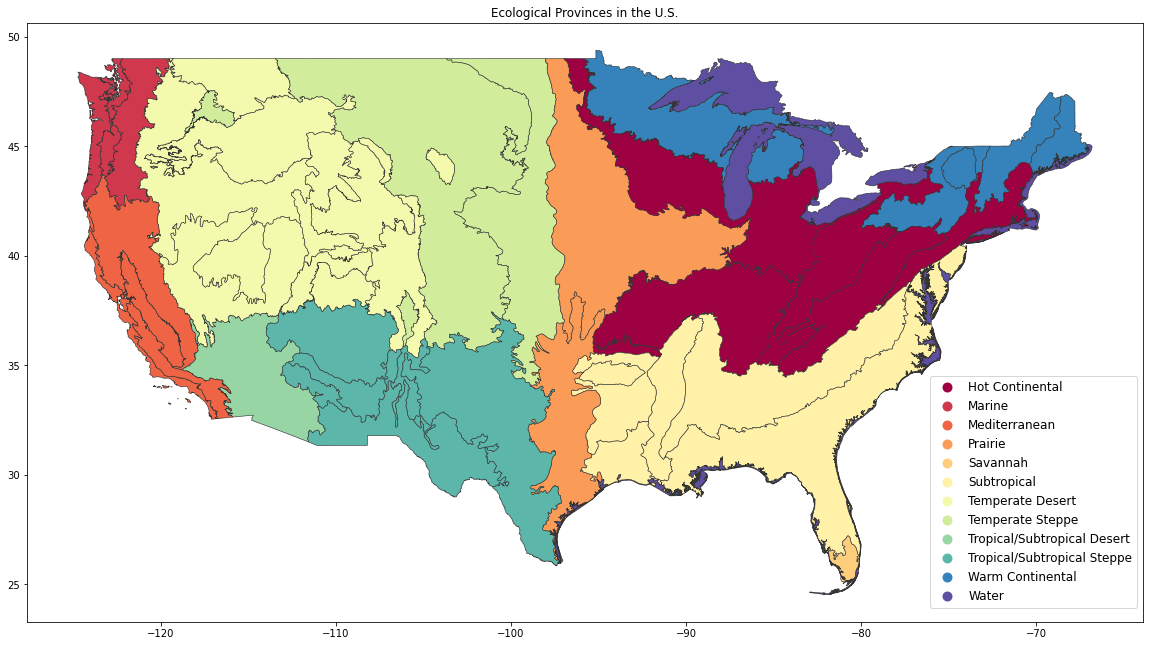

In [88]:
fig, ax = plt.subplots(figsize=(20,20))
eco.plot(column='DIVISION_NAME', categorical=True, cmap='Spectral', linewidth=.6, edgecolor='0.2',
         legend=True, legend_kwds={'bbox_to_anchor':(1, .42),'fontsize':12}, ax=ax)

ax.set(title='Ecological Provinces in the U.S.')
plt.show()

In [89]:
graze = gpd.read_file('../data/BLM_National_lupa_approved_poly_shp/lupa_approved_poly.shp')
graze

,LUPName,Status,RODdate,ePLink,AdminSt,NEPAnum,geometry
0,Bering Sea-Western Interior RMP,Completed,01/15/2021,https://eplanning.blm.gov/eplanning-ui/project...,AK,DOI-BLM-AK-A010-2013-0039-RMP-EIS,"POLYGON ((-158.47031 66.08419, -158.46481 66.0..."
1,Draanjik RMP,Completed,12/30/2016,https://eplanning.blm.gov/eplanning-ui/project...,AK,DOI-BLM-AK-F020-2008-0001-RMP-EIS,"POLYGON ((-141.00131 65.03684, -141.02390 65.0..."
2,Butte Field Office Approved RMP,Completed,04/20/2009,https://eplanning.blm.gov/eplanning-ui/project...,MT,DOI-BLM-MT-B070-2008-0002-RMP-EIS,"POLYGON ((-110.28192 46.18440, -110.28191 46.1..."
3,Billings Field Office RMP,Completed,09/21/2015,https://eplanning.blm.gov/eplanning-ui/project...,MT,DOI-BLM-MT-A010-2017-0056-RMP-EIS,"POLYGON ((-107.82748 46.75594, -107.82733 46.7..."
4,Missoula Field Office RMP and EIS,Completed,01/04/2021,https://eplanning.blm.gov/eplanning-ui/project...,MT,DOI-BLM-MT-B010-2016-0019-RMP-EIS,"POLYGON ((-114.04592 48.96263, -114.04532 48.9..."
...,...,...,...,...,...,...,...
173,Cottonwood RMP,Completed,12/21/2009,https://eplanning.blm.gov/eplanning-ui/project...,ID,DOI-BLM-ID-C020-2005-0001-RMP-EIS,"POLYGON ((-117.01274 47.13072, -117.01144 47.1..."
174,Pocatello RMP,Completed,07/10/2012,https://eplanning.blm.gov/eplanning-ui/project...,ID,DOI-BLM-ID-I020-2003-0001-RMP-EIS,"POLYGON ((-112.04385 43.37491, -112.04380 43.3..."
175,Jarbidge RMP,Completed,09/02/2015,https://eplanning.blm.gov/eplanning-ui/project...,ID,DOI-BLM-ID-T010-2006-0001-RMP-EIS,"POLYGON ((-115.19235 43.00175, -115.19122 43.0..."
176,Dillon RMP,Completed and Monitoring,02/07/2006,https://eplanning.blm.gov/eplanning-ui/project...,MT,DOI-BLM-MT-B050-2004-0001-RMP-EIS,"POLYGON ((-111.37703 44.75159, -111.37822 44.7..."


In [94]:
# remove Hawaii, Alaska, and Puerto Rico
no_AK = (graze['AdminSt'] != 'AK') 
no_HI = (graze['AdminSt'] != 'HI') 
no_PR = (graze['AdminSt'] != 'PR')
graze = graze[no_AK & no_HI & no_PR]
graze

,LUPName,Status,RODdate,ePLink,AdminSt,NEPAnum,geometry
2,Butte Field Office Approved RMP,Completed,04/20/2009,https://eplanning.blm.gov/eplanning-ui/project...,MT,DOI-BLM-MT-B070-2008-0002-RMP-EIS,"POLYGON ((-12276526.740 5779102.781, -12276525..."
3,Billings Field Office RMP,Completed,09/21/2015,https://eplanning.blm.gov/eplanning-ui/project...,MT,DOI-BLM-MT-A010-2017-0056-RMP-EIS,"POLYGON ((-12003300.575 5871188.731, -12003283..."
4,Missoula Field Office RMP and EIS,Completed,01/04/2021,https://eplanning.blm.gov/eplanning-ui/project...,MT,DOI-BLM-MT-B010-2016-0019-RMP-EIS,"POLYGON ((-12695533.803 6236275.222, -12695467..."
5,Lewistown RMP and EIS,Completed,01/04/2021,https://eplanning.blm.gov/eplanning-ui/project...,MT,DOI-BLM-MT-L060-2014-0015-RMP-EIS,"POLYGON ((-12502169.508 6155676.656, -12501564..."
6,South Dakota RMP,Completed,09/21/2015,https://eplanning.blm.gov/eplanning-ui/project...,MT,DOI-BLM-MT-C040-2015-0004-RMP-EIS,"POLYGON ((-10749488.402 5736733.661, -10749519..."
...,...,...,...,...,...,...,...
173,Cottonwood RMP,Completed,12/21/2009,https://eplanning.blm.gov/eplanning-ui/project...,ID,DOI-BLM-ID-C020-2005-0001-RMP-EIS,"POLYGON ((-13025799.116 5932105.587, -13025653..."
174,Pocatello RMP,Completed,07/10/2012,https://eplanning.blm.gov/eplanning-ui/project...,ID,DOI-BLM-ID-I020-2003-0001-RMP-EIS,"POLYGON ((-12472663.950 5339858.552, -12472659..."
175,Jarbidge RMP,Completed,09/02/2015,https://eplanning.blm.gov/eplanning-ui/project...,ID,DOI-BLM-ID-T010-2006-0001-RMP-EIS,"POLYGON ((-12823153.577 5283087.852, -12823027..."
176,Dillon RMP,Completed and Monitoring,02/07/2006,https://eplanning.blm.gov/eplanning-ui/project...,MT,DOI-BLM-MT-B050-2004-0001-RMP-EIS,"POLYGON ((-12398434.100 5552404.943, -12398566..."


In [95]:
graze.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [96]:
graze = graze.to_crs(epsg=3395)

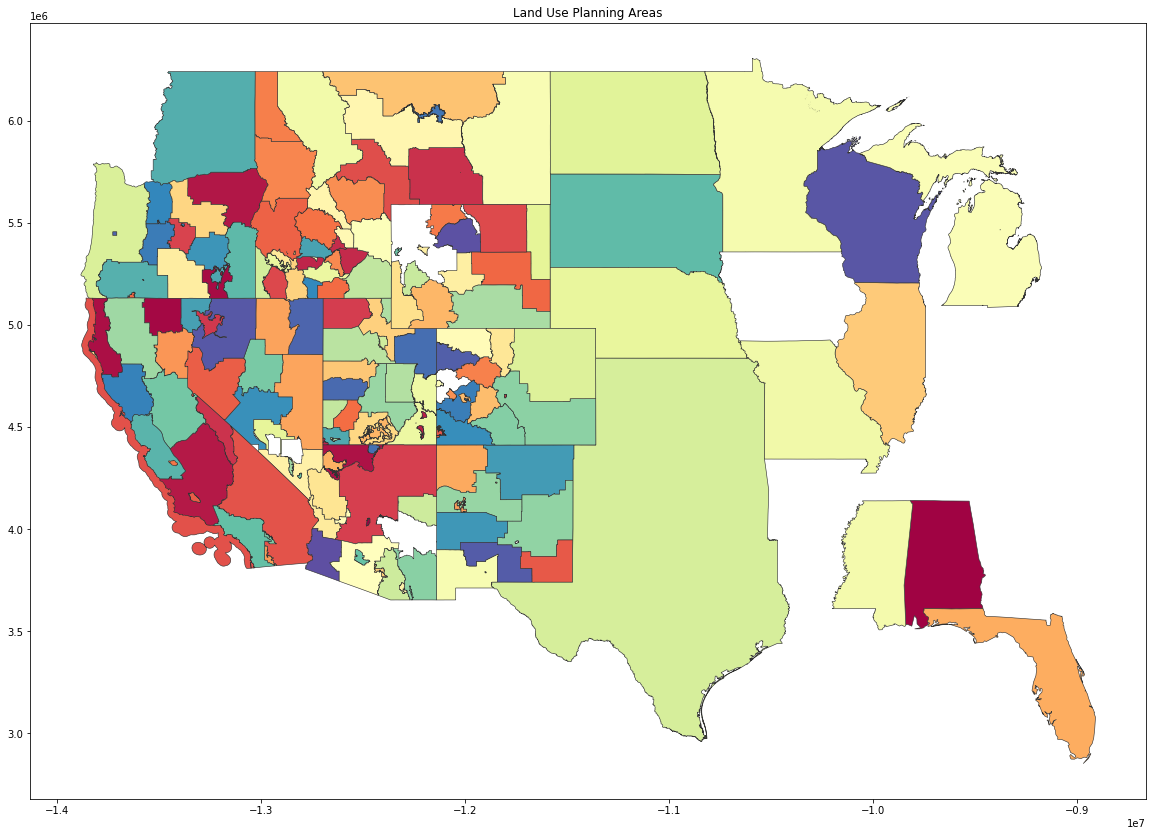

In [99]:
fig, ax = plt.subplots(figsize=(20,20))
graze.plot(column='LUPName', categorical=True, cmap='Spectral', linewidth=.6, edgecolor='0.2',
         legend=False, legend_kwds={'bbox_to_anchor':(1, .42),'fontsize':12}, ax=ax)


ax.set(title='Land Use Planning Areas')
plt.show()

In [ ]:
invasive_plants = gpd.read_file('../data/Current_Invasive_Plants.geojson')
invasive_plants

In [ ]:
# Plot overlayed maps
fig, ax = plt.subplots(figsize=(20,20))
soils.plot(ax=ax)
powerplants.plot(markersize=0.5, color='orange',ax=ax)
usatemp_gdf.plot(markersize=0.5, color='red',ax=ax)
aqi_gdf_usa.plot(markersize=0.5, color='yellow',ax=ax)

xlim = ([soils.total_bounds[0],  soils.total_bounds[2]])
ylim = ([soils.total_bounds[1],  soils.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set(title='Power Plants in the Contiguous USA, Surface Temperature, and Air Quality Index')
plt.show()

In [120]:
import rasterio as rast
cp = rast.open('../data/CroplandPastureArea2000_Geotiff/CroplandPastureArea2000_Geotiff/Cropland2000_5m.tif')
cp

<open DatasetReader name='../data/CroplandPastureArea2000_Geotiff/CroplandPastureArea2000_Geotiff/Cropland2000_5m.tif' mode='r'>

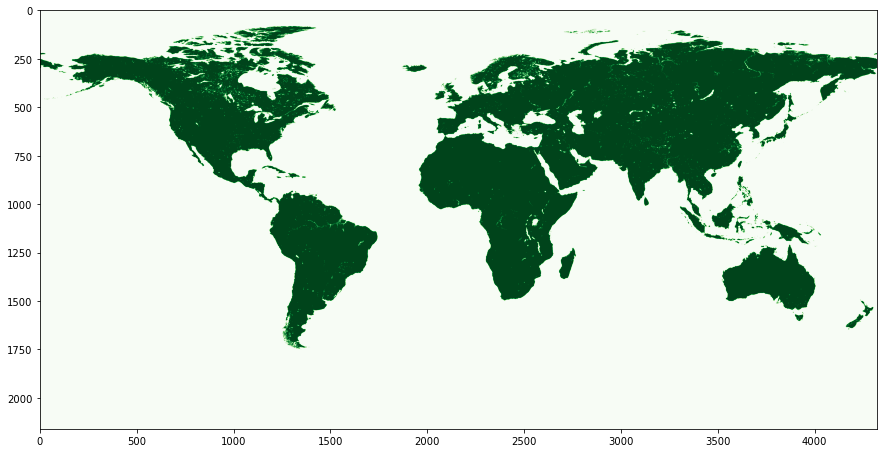

In [122]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.imshow(cp_raster, cmap='Greens')
plt.show()

In [137]:
state_ref = pd.read_csv('../data/state_abbs.csv')
state_ref

,State_N,State_Ab
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [138]:
state_temp = statetemp_grp.merge(state_ref, left_on='State', right_on='State_N')
state_temp

,Year,State,AverageTemperature,State_N,State_Ab
0,1960,Alabama,16.613667,Alabama,AL
1,1961,Alabama,16.850917,Alabama,AL
2,1962,Alabama,17.426167,Alabama,AL
3,1963,Alabama,16.729750,Alabama,AL
4,1964,Alabama,17.126000,Alabama,AL
...,...,...,...,...,...
2641,2009,Wyoming,5.199917,Wyoming,WY
2642,2010,Wyoming,5.756417,Wyoming,WY
2643,2011,Wyoming,5.312250,Wyoming,WY
2644,2012,Wyoming,7.306167,Wyoming,WY


In [139]:
state_temp = state_temp.drop(columns=['State_N'])
state_temp

,Year,State,AverageTemperature,State_Ab
0,1960,Alabama,16.613667,AL
1,1961,Alabama,16.850917,AL
2,1962,Alabama,17.426167,AL
3,1963,Alabama,16.729750,AL
4,1964,Alabama,17.126000,AL
...,...,...,...,...
2641,2009,Wyoming,5.199917,WY
2642,2010,Wyoming,5.756417,WY
2643,2011,Wyoming,5.312250,WY
2644,2012,Wyoming,7.306167,WY


In [140]:
state_temp.dtypes

Year                    int64
State                  object
AverageTemperature    float64
State_Ab               object
dtype: object

In [28]:
crops

,Year,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2,1960,0.863020,1.314405,0.875944,7.509311,1.102172,0.215666,0.123330,1.945921,1.163326,...,1.449408,1.130223,4.025687,0.222890,1.052029,0.157945,1.344930,1.957167,0.186453,0.209497
3,1961,0.816691,1.349605,0.915370,7.343501,1.062330,0.212578,0.119244,2.152937,1.233699,...,1.159234,1.179595,3.932670,0.209571,1.089893,0.162998,1.348380,2.097352,0.183341,0.226525
4,1962,0.738305,1.394829,0.894125,7.728201,0.954135,0.209983,0.113501,2.467778,1.128436,...,1.365035,1.099682,3.671237,0.243141,1.126861,0.154980,1.462482,2.154249,0.172485,0.226393
5,1963,0.935998,1.456042,0.968581,7.886969,0.831364,0.218605,0.109854,2.010038,1.386955,...,1.417146,1.213836,4.090695,0.237186,0.879029,0.151962,1.598017,1.968646,0.162256,0.254502
6,1964,0.897049,1.527136,0.866725,8.307314,0.837551,0.211611,0.098910,1.956158,1.270681,...,1.154879,1.321503,3.797986,0.234716,1.031948,0.146725,1.663164,1.903562,0.163224,0.242913
7,1965,0.921270,1.675313,0.926343,8.005043,0.818390,0.215163,0.136545,2.329985,1.348143,...,1.381165,1.261282,4.283360,0.252319,1.026239,0.132018,1.635818,2.044990,0.152710,0.220157
8,1966,0.702829,1.394014,0.896064,8.586863,0.982450,0.215972,0.097159,2.491814,1.144025,...,1.377868,1.074227,4.276401,0.239014,0.923840,0.159081,1.776637,2.205167,0.121709,0.227366
9,1967,0.616542,1.300783,0.851608,7.718895,0.928733,0.207115,0.149960,2.937796,1.399310,...,1.565086,0.998592,3.779990,0.283692,1.047327,0.156770,1.935799,2.221714,0.165703,0.298910
10,1968,0.660685,1.596347,0.894460,8.883205,1.050997,0.191068,0.116327,2.458111,1.214029,...,1.620280,1.034629,4.265132,0.267712,1.032268,0.145351,1.833613,2.388968,0.160302,0.288325
11,1969,0.716008,1.668315,0.983559,9.201735,1.153197,0.191744,0.144445,2.848779,1.218456,...,1.602828,1.115271,4.019748,0.270275,1.083208,0.146417,1.866641,2.236693,0.163308,0.283841


In [31]:
livestock = pd.read_excel('../data/usda_livestock_output.xlsx', header=5)
livestock = livestock.dropna()
livestock

,Year,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2,1960,0.450464,0.320767,0.203055,1.546257,0.447052,0.090531,0.081866,0.261300,0.533815,...,0.580683,0.430724,1.461878,0.188581,0.361287,0.167176,0.271571,1.803398,0.127699,0.161523
3,1961,0.487183,0.382439,0.214538,1.639567,0.474570,0.089617,0.080212,0.270783,0.579638,...,0.644547,0.444122,1.520713,0.193553,0.371684,0.172574,0.281085,1.821798,0.124402,0.156513
4,1962,0.500488,0.388813,0.245871,1.734953,0.494968,0.087641,0.082095,0.282982,0.595167,...,0.654109,0.443011,1.591044,0.194365,0.361622,0.171309,0.284347,1.857005,0.118109,0.163105
5,1963,0.512270,0.421954,0.239095,1.736934,0.553478,0.086825,0.091447,0.297993,0.638344,...,0.691100,0.450699,1.602084,0.196505,0.367249,0.170741,0.284903,1.873435,0.113618,0.180531
6,1964,0.538191,0.457701,0.239859,1.727789,0.548633,0.088068,0.094451,0.315775,0.666640,...,0.712722,0.448625,1.587293,0.191812,0.357490,0.171669,0.289460,1.908336,0.112577,0.178518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,1973-79,0.572945,3.516437,-4.411904,0.895082,0.381619,0.650156,4.119364,0.536789,2.017074,...,-2.103181,-1.337516,-0.644533,-0.477804,4.162708,2.125385,4.316589,2.343920,1.344777,0.688124
56,1979-81,0.524351,1.074259,-3.695965,0.623758,-6.708215,2.186999,-0.255393,-0.712308,7.314735,...,2.148594,-0.560648,-1.516252,6.188110,1.575418,0.981440,3.166909,1.085760,0.566131,-0.851746
57,1981-90,3.081435,3.546829,0.506050,2.606441,1.214462,0.560791,4.188962,1.016558,-0.093679,...,-0.882371,-1.069422,2.113278,1.415358,2.056234,-0.458833,2.395401,0.339243,1.416951,-0.581247
58,1990-2000,1.463700,1.808149,3.457022,2.442482,2.989242,0.828211,2.336711,0.877765,3.115710,...,0.667802,-0.418902,1.825122,3.185361,1.506698,1.647656,2.056530,-0.187775,2.104495,1.889660


In [32]:
livestock.tail(10)

,Year,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
46,2004,1.164223,1.550567,0.451153,3.727383,1.085124,0.077141,0.280209,0.520748,1.592106,...,0.726806,0.421948,3.336220,0.352727,0.693008,0.199412,0.589877,2.020115,0.139117,0.224587
51,1960-2004,2.158026,3.581047,1.814385,1.999702,2.015396,-0.363780,2.796466,1.567265,2.483554,...,0.510124,-0.046788,1.875265,1.423109,1.480382,0.400739,1.762932,0.257913,0.194639,0.749132
52,1960-66,5.628921,8.924156,4.501910,2.876020,5.243845,-0.551024,3.562159,4.805735,5.989053,...,3.777428,1.466876,2.254887,1.045592,-0.118852,-0.504710,1.819901,-0.086332,-2.995544,2.541964
53,1966-69,2.763746,5.161253,10.606365,1.104283,6.436446,-3.698365,3.640794,5.962874,4.108301,...,-0.049313,0.760710,4.077489,0.036912,1.420455,0.239766,-2.023624,-0.939452,-4.114792,0.707273
54,1969-73,1.478708,3.096447,3.701725,1.369329,5.058577,-1.373052,1.359912,2.992564,0.316877,...,3.121885,1.626583,6.535645,0.337775,0.498684,0.319252,4.274342,0.100109,-0.101725,1.007114
55,1973-79,0.572945,3.516437,-4.411904,0.895082,0.381619,0.650156,4.119364,0.536789,2.017074,...,-2.103181,-1.337516,-0.644533,-0.477804,4.162708,2.125385,4.316589,2.343920,1.344777,0.688124
56,1979-81,0.524351,1.074259,-3.695965,0.623758,-6.708215,2.186999,-0.255393,-0.712308,7.314735,...,2.148594,-0.560648,-1.516252,6.188110,1.575418,0.981440,3.166909,1.085760,0.566131,-0.851746
57,1981-90,3.081435,3.546829,0.506050,2.606441,1.214462,0.560791,4.188962,1.016558,-0.093679,...,-0.882371,-1.069422,2.113278,1.415358,2.056234,-0.458833,2.395401,0.339243,1.416951,-0.581247
58,1990-2000,1.463700,1.808149,3.457022,2.442482,2.989242,0.828211,2.336711,0.877765,3.115710,...,0.667802,-0.418902,1.825122,3.185361,1.506698,1.647656,2.056530,-0.187775,2.104495,1.889660
59,2000-04,0.029315,0.725379,0.233544,1.859957,-3.006286,-4.429253,0.009088,-2.364101,0.675940,...,-0.743378,0.827960,0.059069,0.195050,-0.526587,-2.099444,-4.683534,-0.781599,-0.927450,-1.132726


In [33]:
livestock = livestock.head(45)
livestock

,Year,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2,1960,0.450464,0.320767,0.203055,1.546257,0.447052,0.090531,0.081866,0.261300,0.533815,...,0.580683,0.430724,1.461878,0.188581,0.361287,0.167176,0.271571,1.803398,0.127699,0.161523
3,1961,0.487183,0.382439,0.214538,1.639567,0.474570,0.089617,0.080212,0.270783,0.579638,...,0.644547,0.444122,1.520713,0.193553,0.371684,0.172574,0.281085,1.821798,0.124402,0.156513
4,1962,0.500488,0.388813,0.245871,1.734953,0.494968,0.087641,0.082095,0.282982,0.595167,...,0.654109,0.443011,1.591044,0.194365,0.361622,0.171309,0.284347,1.857005,0.118109,0.163105
5,1963,0.512270,0.421954,0.239095,1.736934,0.553478,0.086825,0.091447,0.297993,0.638344,...,0.691100,0.450699,1.602084,0.196505,0.367249,0.170741,0.284903,1.873435,0.113618,0.180531
6,1964,0.538191,0.457701,0.239859,1.727789,0.548633,0.088068,0.094451,0.315775,0.666640,...,0.712722,0.448625,1.587293,0.191812,0.357490,0.171669,0.289460,1.908336,0.112577,0.178518
7,1965,0.580973,0.488559,0.259743,1.822702,0.552958,0.088644,0.093976,0.324411,0.704304,...,0.709452,0.452851,1.625987,0.189299,0.355722,0.172147,0.302139,1.807422,0.110428,0.180900
8,1966,0.631447,0.547939,0.266025,1.837486,0.612351,0.087587,0.101374,0.348631,0.764630,...,0.728401,0.470352,1.673664,0.200790,0.358720,0.162190,0.302904,1.794081,0.106692,0.188136
9,1967,0.644341,0.588214,0.280468,1.896197,0.698999,0.084500,0.104594,0.380683,0.802381,...,0.774006,0.481364,1.717567,0.200004,0.358997,0.158174,0.291582,1.785474,0.103290,0.197318
10,1968,0.653615,0.605480,0.314590,1.894127,0.681078,0.081803,0.096406,0.396357,0.815704,...,0.771329,0.477121,1.733741,0.199744,0.364057,0.159683,0.296108,1.783164,0.098983,0.197771
11,1969,0.686033,0.639702,0.365689,1.899379,0.742779,0.078389,0.113074,0.416922,0.864924,...,0.727324,0.481209,1.891442,0.201013,0.374337,0.163360,0.285062,1.744223,0.094302,0.192170


In [37]:
pesticide = pd.read_excel('../data/usda_pesticide_input.xlsx', header=5)
pesticide.columns

Index(['Year', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64'],
      dtype='object')

In [38]:
pesticide = pesticide.drop(columns=['Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64'])
pesticide

,Year,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960,0.178484,0.106171,0.087280,1.062667,0.133525,0.034140,0.044995,0.779521,0.169806,...,0.101595,0.092337,0.485099,0.069292,0.180571,0.078544,0.705498,0.117415,0.079545,0.090811
3,1961,0.247011,0.167392,0.098225,1.094315,0.132701,0.034168,0.049297,0.744824,0.213233,...,0.122563,0.123432,0.674952,0.072814,0.199443,0.083884,0.858723,0.139824,0.090569,0.092019
4,1962,0.314190,0.254977,0.107444,1.108723,0.130355,0.031923,0.050118,0.782909,0.276845,...,0.137305,0.158171,0.856194,0.067527,0.215441,0.086322,0.990876,0.154301,0.100363,0.087985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,1973-79,10.462063,9.047761,10.593993,12.004515,11.758757,3.035230,12.607397,4.583463,9.847706,...,16.971792,14.805593,6.487497,9.254164,9.641652,5.169438,11.408569,12.912027,12.436573,5.658515
56,1979-81,-1.400593,5.347387,3.944790,7.749684,7.640326,2.863021,6.169259,3.261476,8.241764,...,4.446101,2.491801,3.367449,4.200298,5.003744,-11.869016,0.281304,6.521305,-9.504065,-5.282463
57,1981-90,-2.245352,3.360437,-2.972306,0.905633,1.085491,1.329006,-2.136154,3.137201,-2.956186,...,3.074134,0.057190,0.402944,0.191990,-1.612102,-2.633790,-1.178145,2.365646,-1.770276,-0.093298
58,1990-2000,0.922101,4.975249,3.525278,2.229700,3.806531,3.669560,2.648079,-1.471705,3.782412,...,7.725309,4.224510,3.837875,0.448343,2.160851,4.700115,-2.562794,4.609201,-4.141856,0.147413


In [39]:
pesticide = pesticide.dropna()

In [40]:
pesticide.tail(10)

,Year,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
46,2004,1.042029,3.144619,0.841938,8.133400,0.735248,0.080110,0.181144,2.711322,2.024954,...,3.244875,1.541541,4.843303,0.100002,1.036892,0.078452,2.048215,2.329117,0.066102,0.100739
51,1960-2004,4.010056,7.700904,5.151319,4.625448,3.877087,1.938463,3.165311,2.832983,5.633289,...,7.872369,6.397943,5.229542,0.833772,3.972412,-0.002667,2.422319,6.789843,-0.420746,0.235819
52,1960-66,10.108244,21.032206,9.036106,-1.333441,0.147122,-4.894536,2.688247,-0.446330,16.608485,...,17.761765,10.333674,12.396462,-8.618110,3.301499,-10.957697,7.575075,15.211794,1.546462,-1.795203
53,1966-69,3.315953,11.216549,26.209441,22.177762,4.151492,16.696839,-0.812601,29.431444,8.802225,...,-16.088974,6.211886,11.100771,-0.758855,7.887171,-4.551321,20.950407,9.213661,-14.285716,-3.297927
54,1969-73,10.219433,8.158036,6.520993,7.977522,10.577328,-1.498648,8.373920,0.063343,5.599742,...,13.261955,12.782323,10.854842,9.489580,7.018617,10.893281,-5.022024,9.813787,-1.585888,6.104722
55,1973-79,10.462063,9.047761,10.593993,12.004515,11.758757,3.035230,12.607397,4.583463,9.847706,...,16.971792,14.805593,6.487497,9.254164,9.641652,5.169438,11.408569,12.912027,12.436573,5.658515
56,1979-81,-1.400593,5.347387,3.944790,7.749684,7.640326,2.863021,6.169259,3.261476,8.241764,...,4.446101,2.491801,3.367449,4.200298,5.003744,-11.869016,0.281304,6.521305,-9.504065,-5.282463
57,1981-90,-2.245352,3.360437,-2.972306,0.905633,1.085491,1.329006,-2.136154,3.137201,-2.956186,...,3.074134,0.057190,0.402944,0.191990,-1.612102,-2.633790,-1.178145,2.365646,-1.770276,-0.093298
58,1990-2000,0.922101,4.975249,3.525278,2.229700,3.806531,3.669560,2.648079,-1.471705,3.782412,...,7.725309,4.224510,3.837875,0.448343,2.160851,4.700115,-2.562794,4.609201,-4.141856,0.147413
59,2000-04,3.995847,0.346749,-3.056614,-1.224293,-4.680649,-0.507601,-0.788001,-2.189990,3.154982,...,4.847370,3.291381,-2.166433,-4.356014,7.071042,1.283515,-3.603573,-4.327851,5.787213,-4.349619


In [41]:
pesticide = pesticide.head(45)
pesticide

,Year,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2,1960,0.178484,0.106171,0.087280,1.062667,0.133525,0.034140,0.044995,0.779521,0.169806,...,0.101595,0.092337,0.485099,0.069292,0.180571,0.078544,0.705498,0.117415,0.079545,0.090811
3,1961,0.247011,0.167392,0.098225,1.094315,0.132701,0.034168,0.049297,0.744824,0.213233,...,0.122563,0.123432,0.674952,0.072814,0.199443,0.083884,0.858723,0.139824,0.090569,0.092019
4,1962,0.314190,0.254977,0.107444,1.108723,0.130355,0.031923,0.050118,0.782909,0.276845,...,0.137305,0.158171,0.856194,0.067527,0.215441,0.086322,0.990876,0.154301,0.100363,0.087985
5,1963,0.322252,0.272686,0.109641,1.036738,0.126061,0.026219,0.047197,0.667724,0.313717,...,0.146935,0.175893,1.021840,0.049770,0.207750,0.078187,1.276884,0.170272,0.116325,0.080529
6,1964,0.404092,0.340872,0.118347,1.031267,0.122670,0.021827,0.046154,0.702270,0.358204,...,0.173652,0.217140,1.087414,0.040229,0.227969,0.078390,1.466175,0.179696,0.107149,0.071911
7,1965,0.363715,0.328412,0.126760,0.950836,0.124206,0.023633,0.047779,0.681178,0.390485,...,0.214130,0.200027,0.994560,0.031849,0.202897,0.058755,1.520572,0.222946,0.104876,0.077636
8,1966,0.327338,0.375021,0.150099,0.980959,0.134709,0.025452,0.052871,0.758922,0.459971,...,0.294918,0.171651,1.020595,0.041316,0.220128,0.040699,1.111436,0.292487,0.087279,0.081538
9,1967,0.404394,0.526235,0.234195,1.519758,0.169566,0.040556,0.070307,1.276692,0.608416,...,0.312828,0.222388,1.451047,0.094172,0.284142,0.045198,1.673125,0.369853,0.101013,0.103437
10,1968,0.376847,0.496752,0.281349,1.762349,0.149624,0.035373,0.057279,1.479298,0.478004,...,0.245496,0.207700,1.440976,0.054424,0.273283,0.041232,1.527051,0.371105,0.081106,0.084151
11,1969,0.361576,0.525042,0.329500,1.908101,0.152576,0.042002,0.051597,1.835078,0.598982,...,0.182004,0.206814,1.423914,0.040386,0.278893,0.035504,2.083741,0.385612,0.056857,0.073857


In [46]:
energy = pd.read_excel('../data/usda_energy_input.xlsx', header=5)
energy.columns

Index(['Year', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64'],
      dtype='object')

In [47]:
energy = energy.drop(columns=['Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64'])
energy = energy.dropna()
energy = energy.head(45)
energy

,Year,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2,1960,0.898525,1.726459,0.681424,5.089436,1.131987,0.160933,0.098529,0.842497,1.412659,...,1.611006,1.020673,6.257787,0.349966,0.921488,0.170680,1.377598,1.971020,0.235911,0.369047
3,1961,0.918041,1.753971,0.716768,5.573420,1.137502,0.163242,0.104050,0.878546,1.455220,...,1.625616,1.012615,6.346984,0.345231,0.870235,0.168004,1.427013,1.924042,0.229707,0.378130
4,1962,0.939338,1.790455,0.756092,5.518810,1.141354,0.167825,0.105304,0.960891,1.465340,...,1.639192,1.005289,6.380478,0.337865,0.914343,0.168061,1.407428,1.917315,0.229760,0.375116
5,1963,0.970191,1.869814,0.786799,5.529642,1.183112,0.180751,0.112125,1.006508,1.518619,...,1.711350,1.039959,6.622695,0.345901,0.924863,0.170003,1.425789,1.977929,0.243758,0.379000
6,1964,1.005091,1.910195,0.826302,5.522220,1.218111,0.188931,0.124589,1.039332,1.568922,...,1.795364,1.059269,6.937683,0.344635,0.971385,0.167047,1.446548,1.992900,0.230940,0.403921
7,1965,1.030791,1.914046,0.805510,5.439132,1.258188,0.182516,0.127557,1.072076,1.604336,...,1.780546,1.180695,7.085502,0.354278,1.017466,0.162034,1.447960,2.018165,0.311524,0.400513
8,1966,1.042934,1.948036,0.771024,5.415232,1.224446,0.174526,0.126711,1.102791,1.676833,...,1.851629,1.262187,7.151411,0.361446,1.053651,0.161838,1.496508,2.044348,0.235447,0.427731
9,1967,1.078183,1.934602,0.727002,5.065116,1.231950,0.165527,0.125351,1.119919,1.696287,...,1.891207,1.272516,7.201469,0.362714,1.070525,0.159975,1.475403,1.989503,0.241865,0.422094
10,1968,1.104818,1.984302,0.737477,4.905438,1.231921,0.159518,0.128637,1.143745,1.713065,...,1.847882,1.285975,7.175344,0.365112,1.082027,0.157637,1.461357,2.017179,0.227639,0.426016
11,1969,1.141053,1.998541,0.693732,5.284447,1.262915,0.153878,0.132478,1.243644,1.757899,...,1.887881,1.339614,7.296759,0.356119,1.096318,0.153979,1.523480,2.039793,0.227089,0.423335


In [48]:
# create dataframe for california only (size constraint for data analysis)
state_temp_ca = state_temp[state_temp['State_Ab'] == 'CA']
state_temp_ca

,Year,State,AverageTemperature,State_Ab
216,1960,California,14.671250,CA
217,1961,California,14.549333,CA
218,1962,California,14.281417,CA
219,1963,California,14.170750,CA
220,1964,California,13.812667,CA
...,...,...,...,...
265,2009,California,15.004250,CA
266,2010,California,14.408167,CA
267,2011,California,14.265750,CA
268,2012,California,15.358500,CA


In [50]:
# create dataframes for california only (size constraint for data analysis)
crops_ca = crops[['Year', 'CA']]
livestock_ca = livestock[['Year', 'CA']]
pesticide_ca = pesticide[['Year', 'CA']]
energy_ca = energy[['Year', 'CA']]

In [54]:
energy_ca

,Year,CA
2,1960,5.089436
3,1961,5.573420
4,1962,5.518810
5,1963,5.529642
6,1964,5.522220
7,1965,5.439132
8,1966,5.415232
9,1967,5.065116
10,1968,4.905438
11,1969,5.284447


In [55]:
ca_data = state_temp_ca.merge(crops_ca, left_on='Year', right_on='Year')
ca_data

,Year,State,AverageTemperature,State_Ab,CA
0,1960,California,14.671250,CA,7.509311
1,1961,California,14.549333,CA,7.343501
2,1962,California,14.281417,CA,7.728201
3,1963,California,14.170750,CA,7.886969
4,1964,California,13.812667,CA,8.307314
5,1965,California,13.921083,CA,8.005043
6,1966,California,14.607250,CA,8.586863
7,1967,California,14.383917,CA,7.718895
8,1968,California,14.415417,CA,8.883205
9,1969,California,14.341917,CA,9.201735


In [57]:
ca_data=ca_data.rename(columns={"CA": "crop_output"})
ca_data

,Year,State,AverageTemperature,State_Ab,crop_output
0,1960,California,14.671250,CA,7.509311
1,1961,California,14.549333,CA,7.343501
2,1962,California,14.281417,CA,7.728201
3,1963,California,14.170750,CA,7.886969
4,1964,California,13.812667,CA,8.307314
5,1965,California,13.921083,CA,8.005043
6,1966,California,14.607250,CA,8.586863
7,1967,California,14.383917,CA,7.718895
8,1968,California,14.415417,CA,8.883205
9,1969,California,14.341917,CA,9.201735


In [58]:
ca_data = ca_data.merge(livestock_ca, left_on='Year', right_on='Year')
ca_data = ca_data.rename(columns={"CA": "livestock_output"})
ca_data

,Year,State,AverageTemperature,State_Ab,crop_output,livestock_output
0,1960,California,14.671250,CA,7.509311,1.546257
1,1961,California,14.549333,CA,7.343501,1.639567
2,1962,California,14.281417,CA,7.728201,1.734953
3,1963,California,14.170750,CA,7.886969,1.736934
4,1964,California,13.812667,CA,8.307314,1.727789
5,1965,California,13.921083,CA,8.005043,1.822702
6,1966,California,14.607250,CA,8.586863,1.837486
7,1967,California,14.383917,CA,7.718895,1.896197
8,1968,California,14.415417,CA,8.883205,1.894127
9,1969,California,14.341917,CA,9.201735,1.899379


In [59]:
ca_data = ca_data.merge(pesticide_ca, left_on='Year', right_on='Year')
ca_data = ca_data.rename(columns={"CA": "pesticide_input"})
ca_data

,Year,State,AverageTemperature,State_Ab,crop_output,livestock_output,pesticide_output
0,1960,California,14.671250,CA,7.509311,1.546257,1.062667
1,1961,California,14.549333,CA,7.343501,1.639567,1.094315
2,1962,California,14.281417,CA,7.728201,1.734953,1.108723
3,1963,California,14.170750,CA,7.886969,1.736934,1.036738
4,1964,California,13.812667,CA,8.307314,1.727789,1.031267
5,1965,California,13.921083,CA,8.005043,1.822702,0.950836
6,1966,California,14.607250,CA,8.586863,1.837486,0.980959
7,1967,California,14.383917,CA,7.718895,1.896197,1.519758
8,1968,California,14.415417,CA,8.883205,1.894127,1.762349
9,1969,California,14.341917,CA,9.201735,1.899379,1.908101


In [60]:
ca_data = ca_data.merge(energy_ca, left_on='Year', right_on='Year')
ca_data = ca_data.rename(columns={"pesticide_output": "pesticide_input"})
ca_data = ca_data.rename(columns={"CA": "energy_input"})
ca_data

,Year,State,AverageTemperature,State_Ab,crop_output,livestock_output,pesticide_input,energy_input
0,1960,California,14.671250,CA,7.509311,1.546257,1.062667,5.089436
1,1961,California,14.549333,CA,7.343501,1.639567,1.094315,5.573420
2,1962,California,14.281417,CA,7.728201,1.734953,1.108723,5.518810
3,1963,California,14.170750,CA,7.886969,1.736934,1.036738,5.529642
4,1964,California,13.812667,CA,8.307314,1.727789,1.031267,5.522220
5,1965,California,13.921083,CA,8.005043,1.822702,0.950836,5.439132
6,1966,California,14.607250,CA,8.586863,1.837486,0.980959,5.415232
7,1967,California,14.383917,CA,7.718895,1.896197,1.519758,5.065116
8,1968,California,14.415417,CA,8.883205,1.894127,1.762349,4.905438
9,1969,California,14.341917,CA,9.201735,1.899379,1.908101,5.284447


In [63]:
# OLS (basic between temperature and single dependent variable)
X = ca_data[['AverageTemperature']]
y = ca_data[['crop_output']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            crop_output   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              416.0
Date:                Fri, 10 Dec 2021   Prob (F-statistic):                    4.72e-24
Time:                        05:46:43   Log-Likelihood:                         -133.00
No. Observations:                  45   AIC:                                      268.0
Df Residuals:                      44   BIC:                                      269.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AverageTemperature     0.9812      0.048     20.396      0.000       0.884       1.078
==============================================================================
Omnibus:                       10.806   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                2.997
Skew:                           0.179   Prob(JB):                        0.223
Kurtosis:                       1.788   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# OLS (basic between temperature and single dependent variable)
X = ca_data[['AverageTemperature']]
y = ca_data[['livestock_output']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       livestock_output   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              823.1
Date:                Fri, 10 Dec 2021   Prob (F-statistic):                    4.05e-30
Time:                        05:48:03   Log-Likelihood:                         -37.799
No. Observations:                  45   AIC:                                      77.60
Df Residuals:                      44   BIC:                                      79.41
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AverageTemperature     0.1664      0.006     28.690      0.000       0.155       0.178
==============================================================================
Omnibus:                        4.707   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                4.457
Skew:                           0.718   Prob(JB):                        0.108
Kurtosis:                       2.441   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# OLS (between temperature and other intermediary factors (indicators))
X = ca_data[['AverageTemperature']]
y = ca_data[['pesticide_input']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pesticide_input   R-squared (uncentered):                   0.755
Model:                            OLS   Adj. R-squared (uncentered):              0.750
Method:                 Least Squares   F-statistic:                              135.9
Date:                Fri, 10 Dec 2021   Prob (F-statistic):                    4.82e-15
Time:                        05:48:32   Log-Likelihood:                         -114.34
No. Observations:                  45   AIC:                                      230.7
Df Residuals:                      44   BIC:                                      232.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AverageTemperature     0.3704      0.032     11.656      0.000       0.306       0.434
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                2.876
Skew:                           0.107   Prob(JB):                        0.237
Kurtosis:                       1.780   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# OLS (between temperature and other intermediary factors (indicators))
X = ca_data[['AverageTemperature']]
y = ca_data[['energy_input']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           energy_input   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              1864.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):                    1.17e-37
Time:                        05:48:47   Log-Likelihood:                         -62.817
No. Observations:                  45   AIC:                                      127.6
Df Residuals:                      44   BIC:                                      129.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AverageTemperature     0.4365      0.010     43.172      0.000       0.416       0.457
==============================================================================
Omnibus:                        6.178   Durbin-Watson:                   0.342
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                3.966
Skew:                           0.556   Prob(JB):                        0.138
Kurtosis:                       2.063   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# OLS (between temp, indicators, and outputs)
X = ca_data[['AverageTemperature', 'pesticide_input', 'energy_input']]
y = ca_data[['crop_output']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            crop_output   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              1403.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):                    4.09e-42
Time:                        05:49:38   Log-Likelihood:                         -81.932
No. Observations:                  45   AIC:                                      169.9
Df Residuals:                      42   BIC:                                      175.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AverageTemperature     0.3624      0.110      3.290      0.002       0.140       0.585
pesticide_input        1.3899      0.090     15.366      0.000       1.207       1.572
energy_input           0.2382      0.284      0.838      0.407      -0.335       0.812
==============================================================================
Omnibus:                        5.296   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                5.083
Skew:                           0.380   Prob(JB):                       0.0788
Kurtosis:                       4.460   Cond. No.                         22.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# OLS (between temp, indicators, and outputs)
X = ca_data[['energy_input', 'pesticide_input']]
y = ca_data[['crop_output']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            crop_output   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1708.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):                    1.07e-41
Time:                        05:51:17   Log-Likelihood:                         -87.091
No. Observations:                  45   AIC:                                      178.2
Df Residuals:                      43   BIC:                                      181.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
energy_input        1.1330      0.092     12.380      0.000       0.948       1.318
pesticide_input     1.2935      0.095     13.638      0.000       1.102       1.485
==============================================================================
Omnibus:                        3.223   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                2.682
Skew:                          -0.063   Prob(JB):                        0.262
Kurtosis:                       4.189   Cond. No.                         4.38
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
# OLS (between temp, indicators, and outputs)
X = ca_data[['pesticide_input']]
y = ca_data[['crop_output']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

AttributeError: 'ScalarMappable' object has no attribute 'OLS'

In [68]:
# OLS (between temp, indicators, and outputs)
X = ca_data[['AverageTemperature', 'pesticide_input', 'energy_input']]
y = ca_data[['livestock_output']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       livestock_output   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1158.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):                    2.19e-40
Time:                        05:49:47   Log-Likelihood:                         -5.2560
No. Observations:                  45   AIC:                                      16.51
Df Residuals:                      42   BIC:                                      21.93
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AverageTemperature     0.0866      0.020      4.323      0.000       0.046       0.127
pesticide_input        0.1489      0.016      9.046      0.000       0.116       0.182
energy_input           0.0563      0.052      1.089      0.282      -0.048       0.161
==============================================================================
Omnibus:                        6.777   Durbin-Watson:                   0.360
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                5.664
Skew:                           0.699   Prob(JB):                       0.0589
Kurtosis:                       4.032   Cond. No.                         22.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# create dataframes for texas only (size constraint for data analysis)
state_temp_tx = state_temp[state_temp['State_Ab'] == 'TX']
crops_tx = crops[['Year', 'TX']]
livestock_tx = livestock[['Year', 'TX']]
pesticide_tx = pesticide[['Year', 'TX']]
energy_tx = energy[['Year', 'TX']]

In [74]:
tx_data = state_temp_tx.merge(crops_tx, left_on='Year', right_on='Year')
tx_data = tx_data.rename(columns={"TX": "crop_output"})
tx_data

,Year,State,AverageTemperature,State_Ab,crop_output
0,1960,Texas,17.799417,TX,4.025687
1,1961,Texas,17.709667,TX,3.932670
2,1962,Texas,18.634250,TX,3.671237
3,1963,Texas,18.658000,TX,4.090695
4,1964,Texas,18.352750,TX,3.797986
5,1965,Texas,18.561167,TX,4.283360
6,1966,Texas,17.703167,TX,4.276401
7,1967,Texas,18.443667,TX,3.779990
8,1968,Texas,17.485667,TX,4.265132
9,1969,Texas,18.273667,TX,4.019748


In [75]:
tx_data = tx_data.merge(livestock_tx, left_on='Year', right_on='Year')
tx_data = tx_data.rename(columns={"TX": "livestock_output"})
tx_data

,Year,State,AverageTemperature,State_Ab,crop_output,livestock_output
0,1960,Texas,17.799417,TX,4.025687,1.461878
1,1961,Texas,17.709667,TX,3.932670,1.520713
2,1962,Texas,18.634250,TX,3.671237,1.591044
3,1963,Texas,18.658000,TX,4.090695,1.602084
4,1964,Texas,18.352750,TX,3.797986,1.587293
5,1965,Texas,18.561167,TX,4.283360,1.625987
6,1966,Texas,17.703167,TX,4.276401,1.673664
7,1967,Texas,18.443667,TX,3.779990,1.717567
8,1968,Texas,17.485667,TX,4.265132,1.733741
9,1969,Texas,18.273667,TX,4.019748,1.891442


In [76]:
tx_data = tx_data.merge(pesticide_tx, left_on='Year', right_on='Year')
tx_data = tx_data.rename(columns={"TX": "pesticide_input"})
tx_data

,Year,State,AverageTemperature,State_Ab,crop_output,livestock_output,pesticide_input
0,1960,Texas,17.799417,TX,4.025687,1.461878,0.485099
1,1961,Texas,17.709667,TX,3.932670,1.520713,0.674952
2,1962,Texas,18.634250,TX,3.671237,1.591044,0.856194
3,1963,Texas,18.658000,TX,4.090695,1.602084,1.021840
4,1964,Texas,18.352750,TX,3.797986,1.587293,1.087414
5,1965,Texas,18.561167,TX,4.283360,1.625987,0.994560
6,1966,Texas,17.703167,TX,4.276401,1.673664,1.020595
7,1967,Texas,18.443667,TX,3.779990,1.717567,1.451047
8,1968,Texas,17.485667,TX,4.265132,1.733741,1.440976
9,1969,Texas,18.273667,TX,4.019748,1.891442,1.423914


In [77]:
tx_data = tx_data.merge(energy_tx, left_on='Year', right_on='Year')
tx_data = tx_data.rename(columns={"TX": "energy_input"})
tx_data

,Year,State,AverageTemperature,State_Ab,crop_output,livestock_output,pesticide_input,energy_input
0,1960,Texas,17.799417,TX,4.025687,1.461878,0.485099,6.257787
1,1961,Texas,17.709667,TX,3.932670,1.520713,0.674952,6.346984
2,1962,Texas,18.634250,TX,3.671237,1.591044,0.856194,6.380478
3,1963,Texas,18.658000,TX,4.090695,1.602084,1.021840,6.622695
4,1964,Texas,18.352750,TX,3.797986,1.587293,1.087414,6.937683
5,1965,Texas,18.561167,TX,4.283360,1.625987,0.994560,7.085502
6,1966,Texas,17.703167,TX,4.276401,1.673664,1.020595,7.151411
7,1967,Texas,18.443667,TX,3.779990,1.717567,1.451047,7.201469
8,1968,Texas,17.485667,TX,4.265132,1.733741,1.440976,7.175344
9,1969,Texas,18.273667,TX,4.019748,1.891442,1.423914,7.296759


In [78]:
# OLS (between temp, indicators, and outputs)
X = tx_data[['AverageTemperature', 'pesticide_input', 'energy_input']]
y = tx_data[['crop_output']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            crop_output   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1268.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):                    3.32e-41
Time:                        06:05:25   Log-Likelihood:                         -36.445
No. Observations:                  45   AIC:                                      78.89
Df Residuals:                      42   BIC:                                      84.31
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AverageTemperature     0.2047      0.045      4.534      0.000       0.114       0.296
pesticide_input        0.5019      0.056      8.897      0.000       0.388       0.616
energy_input          -0.0273      0.114     -0.240      0.812      -0.257       0.203
==============================================================================
Omnibus:                        1.262   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                1.045
Skew:                          -0.139   Prob(JB):                        0.593
Kurtosis:                       2.307   Cond. No.                         28.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# drop non-numeric columns
ca_data = ca_data.drop(columns=['State', 'State_Ab'])
ca_data["Year"] = ca_data.Year.astype(float)

In [89]:
# drop non-numeric columns
tx_data = tx_data.drop(columns=['State', 'State_Ab'])
tx_data["Year"] = tx_data.Year.astype(float)

In [92]:
# Checking for the VIF values of the variables. Ignore year.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(ca_data.values, i) for i in range(ca_data.shape[1])]
vif["features"] = ca_data.columns
vif

,VIF Factor,features
0,1547.197918,Year
1,1588.737702,AverageTemperature
2,297.005462,crop_output
3,244.171524,livestock_output
4,47.043281,pesticide_input
5,65.610887,energy_input


In [90]:
# Checking for the VIF values of the variables. Ignore year.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(tx_data.values, i) for i in range(tx_data.shape[1])]
vif["features"] = tx_data.columns
vif

,VIF Factor,features
0,1940.423975,Year
1,1765.108829,AverageTemperature
2,106.778935,crop_output
3,204.780990,livestock_output
4,56.331606,pesticide_input
5,94.738609,energy_input


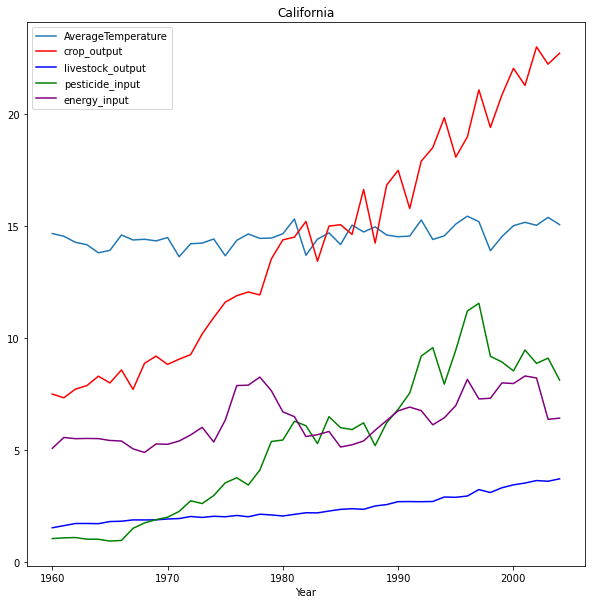

In [94]:
plt.figure(figsize=(10, 10))
ax = plt.gca()
ca_data.plot(kind='line',x='Year',y='AverageTemperature',ax=ax)
ca_data.plot(kind='line',x='Year',y='crop_output', color='red', ax=ax)
ca_data.plot(kind='line',x='Year',y='livestock_output', color='blue', ax=ax)
ca_data.plot(kind='line',x='Year',y='pesticide_input', color='green', ax=ax)
ca_data.plot(kind='line',x='Year',y='energy_input', color='purple', ax=ax)
plt.title('California')
plt.show()

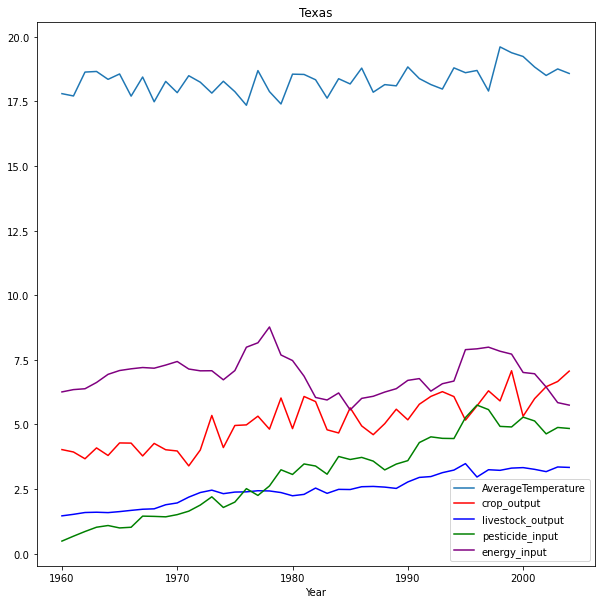

In [95]:
plt.figure(figsize=(10, 10))
ax = plt.gca()
tx_data.plot(kind='line',x='Year',y='AverageTemperature',ax=ax)
tx_data.plot(kind='line',x='Year',y='crop_output', color='red', ax=ax)
tx_data.plot(kind='line',x='Year',y='livestock_output', color='blue', ax=ax)
tx_data.plot(kind='line',x='Year',y='pesticide_input', color='green', ax=ax)
tx_data.plot(kind='line',x='Year',y='energy_input', color='purple', ax=ax)
plt.title('Texas')
plt.show()

In [99]:
states_shp = gpd.read_file('../data/us_states_carto/cb_2018_us_state_20m.shp')
states_shp

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."
...,...,...,...,...,...,...,...,...,...,...
47,23,01779787,0400000US23,23,ME,Maine,00,79887426037,11746549764,"MULTIPOLYGON (((-68.92401 43.88541, -68.87478 ..."
48,15,01779782,0400000US15,15,HI,Hawaii,00,16633990195,11777809026,"MULTIPOLYGON (((-156.04965 19.78045, -156.0062..."
49,33,01779794,0400000US33,33,NH,New Hampshire,00,23189413166,1026675248,"POLYGON ((-72.55611 42.86625, -72.53147 42.897..."
50,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."


<AxesSubplot:>

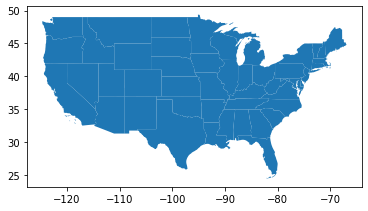

In [100]:
# remove Hawaii, Alaska, and Puerto Rico
no_AK = (states_shp['STUSPS'] != 'AK') 
no_HI = (states_shp['STUSPS'] != 'HI') 
no_PR = (states_shp['STUSPS'] != 'PR')
states_shp = states_shp[no_AK & no_HI & no_PR]
states_shp.plot()

In [101]:
states_gis = states_shp[['STUSPS', 'geometry']]
states_gis

,STUSPS,geometry
0,MD,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,IA,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,DE,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,OH,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,PA,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."
5,NE,"POLYGON ((-104.05314 41.11446, -104.05245 41.2..."
6,WA,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704..."
8,AL,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
9,AR,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."
10,NM,"POLYGON ((-109.04919 31.79655, -109.04830 32.0..."


In [102]:
state_temp

,Year,State,AverageTemperature,State_Ab
0,1960,Alabama,16.613667,AL
1,1961,Alabama,16.850917,AL
2,1962,Alabama,17.426167,AL
3,1963,Alabama,16.729750,AL
4,1964,Alabama,17.126000,AL
...,...,...,...,...
2641,2009,Wyoming,5.199917,WY
2642,2010,Wyoming,5.756417,WY
2643,2011,Wyoming,5.312250,WY
2644,2012,Wyoming,7.306167,WY


In [146]:
state_temp = state_temp.merge(states_gis, left_on='State_Ab', right_on='STUSPS')
state_temp = state_temp.drop(columns=['STUSPS'])
state_temp

,Year,State,AverageTemperature,State_Ab,geometry
0,1960,Alabama,16.613667,AL,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
1,1961,Alabama,16.850917,AL,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
2,1962,Alabama,17.426167,AL,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
3,1963,Alabama,16.729750,AL,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
4,1964,Alabama,17.126000,AL,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
...,...,...,...,...,...
2533,2009,Wyoming,5.199917,WY,"POLYGON ((-111.05689 44.86666, -111.04432 45.0..."
2534,2010,Wyoming,5.756417,WY,"POLYGON ((-111.05689 44.86666, -111.04432 45.0..."
2535,2011,Wyoming,5.312250,WY,"POLYGON ((-111.05689 44.86666, -111.04432 45.0..."
2536,2012,Wyoming,7.306167,WY,"POLYGON ((-111.05689 44.86666, -111.04432 45.0..."


In [147]:
state_temp_1960 = state_temp[state_temp['Year'] == 1960]
state_temp_1960

,Year,State,AverageTemperature,State_Ab,geometry
0,1960,Alabama,16.613667,AL,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
54,1960,Arizona,15.537417,AZ,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
108,1960,Arkansas,15.133583,AR,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."
162,1960,California,14.671250,CA,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
216,1960,Colorado,6.898083,CO,"POLYGON ((-109.05996 38.49999, -109.05151 39.1..."
270,1960,Connecticut,9.450750,CT,"POLYGON ((-73.69594 41.11526, -73.48271 41.212..."
324,1960,Delaware,11.991667,DE,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
378,1960,Florida,21.251833,FL,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ..."
432,1960,Idaho,5.452000,ID,"POLYGON ((-117.24303 44.39097, -117.21507 44.4..."
486,1960,Illinois,10.522917,IL,"POLYGON ((-91.50626 40.20016, -91.49696 40.248..."


In [148]:
state_temp_1970 = state_temp[state_temp['Year'] == 1970]
state_temp_1970

,Year,State,AverageTemperature,State_Ab,geometry
10,1970,Alabama,17.082750,AL,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
64,1970,Arizona,15.191083,AZ,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
118,1970,Arkansas,15.614167,AR,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."
172,1970,California,14.492167,CA,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
226,1970,Colorado,6.946750,CO,"POLYGON ((-109.05996 38.49999, -109.05151 39.1..."
280,1970,Connecticut,9.320250,CT,"POLYGON ((-73.69594 41.11526, -73.48271 41.212..."
334,1970,Delaware,12.167000,DE,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
388,1970,Florida,21.327833,FL,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ..."
442,1970,Idaho,5.519667,ID,"POLYGON ((-117.24303 44.39097, -117.21507 44.4..."
496,1970,Illinois,11.053083,IL,"POLYGON ((-91.50626 40.20016, -91.49696 40.248..."


In [149]:
state_temp_1980 = state_temp[state_temp['Year'] == 1980]
state_temp_1980

,Year,State,AverageTemperature,State_Ab,geometry
20,1980,Alabama,17.286833,AL,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
74,1980,Arizona,15.824250,AZ,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
128,1980,Arkansas,16.108250,AR,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."
182,1980,California,14.662583,CA,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
236,1980,Colorado,7.661250,CO,"POLYGON ((-109.05996 38.49999, -109.05151 39.1..."
290,1980,Connecticut,9.267667,CT,"POLYGON ((-73.69594 41.11526, -73.48271 41.212..."
344,1980,Delaware,12.208083,DE,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
398,1980,Florida,21.673500,FL,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ..."
452,1980,Idaho,5.915167,ID,"POLYGON ((-117.24303 44.39097, -117.21507 44.4..."
506,1980,Illinois,11.110583,IL,"POLYGON ((-91.50626 40.20016, -91.49696 40.248..."


In [150]:
state_temp_1990 = state_temp[state_temp['Year'] == 1990]
state_temp_1990

,Year,State,AverageTemperature,State_Ab,geometry
30,1990,Alabama,18.536500,AL,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
84,1990,Arizona,15.531250,AZ,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
138,1990,Arkansas,16.870083,AR,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."
192,1990,California,14.527583,CA,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
246,1990,Colorado,7.471500,CO,"POLYGON ((-109.05996 38.49999, -109.05151 39.1..."
300,1990,Connecticut,10.831250,CT,"POLYGON ((-73.69594 41.11526, -73.48271 41.212..."
354,1990,Delaware,13.723833,DE,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
408,1990,Florida,22.901500,FL,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ..."
462,1990,Idaho,5.931167,ID,"POLYGON ((-117.24303 44.39097, -117.21507 44.4..."
516,1990,Illinois,12.295500,IL,"POLYGON ((-91.50626 40.20016, -91.49696 40.248..."


In [152]:
state_temp_2000 = state_temp[state_temp['Year'] == 2000]
state_temp_2000

,Year,State,AverageTemperature,State_Ab,geometry
40,2000,Alabama,17.911333,AL,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
94,2000,Arizona,16.510250,AZ,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
148,2000,Arkansas,16.362583,AR,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."
202,2000,California,15.019333,CA,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
256,2000,Colorado,8.204833,CO,"POLYGON ((-109.05996 38.49999, -109.05151 39.1..."
310,2000,Connecticut,9.581000,CT,"POLYGON ((-73.69594 41.11526, -73.48271 41.212..."
364,2000,Delaware,12.347583,DE,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
418,2000,Florida,21.952000,FL,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ..."
472,2000,Idaho,6.239000,ID,"POLYGON ((-117.24303 44.39097, -117.21507 44.4..."
526,2000,Illinois,11.582917,IL,"POLYGON ((-91.50626 40.20016, -91.49696 40.248..."


In [154]:
state_temp_1960 = gpd.GeoDataFrame(state_temp_1960, geometry='geometry')
state_temp_1970 = gpd.GeoDataFrame(state_temp_1970, geometry='geometry')
state_temp_1980 = gpd.GeoDataFrame(state_temp_1980, geometry='geometry')
state_temp_1990 = gpd.GeoDataFrame(state_temp_1990, geometry='geometry')
state_temp_2000 = gpd.GeoDataFrame(state_temp_2000, geometry='geometry')

<AxesSubplot:>

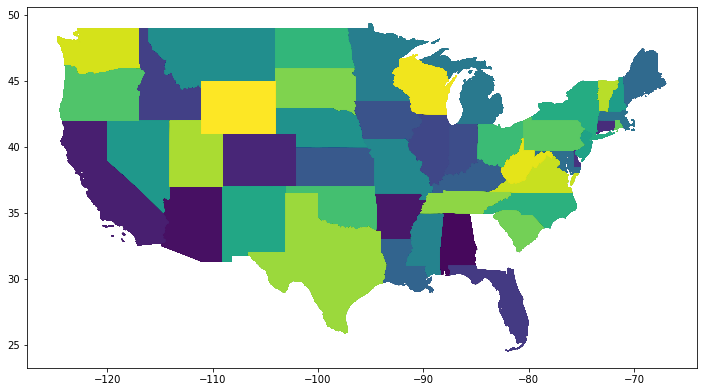

In [151]:
state_gdf = gpd.GeoDataFrame(state_temp, geometry='geometry')
state_gdf.plot(cmap='viridis', figsize=(12, 12))

<AxesSubplot:title={'center':'Average Temperatures by State, 1960'}>

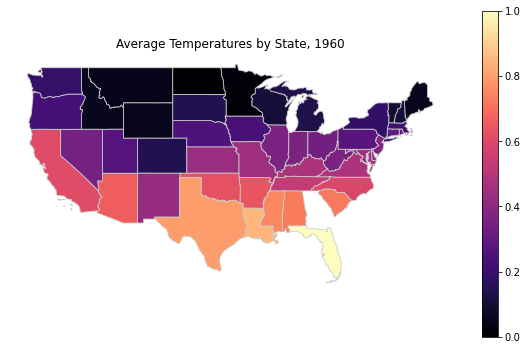

In [164]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Average Temperatures by State, 1960')
sm = plt.cm.ScalarMappable(cmap='magma')
sm.set_array([]) 
fig.colorbar(sm)
state_temp_1960.plot(column='AverageTemperature', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8')

In [178]:
crops_l = pd.melt(crops, id_vars=['Year'], value_name='crop_output')
crops_l = crops_l.merge(states_gis, left_on='variable', right_on='STUSPS')
crops_l = crops_l.drop(columns=['STUSPS'])
crops_l

,Year,variable,crop_output,geometry
0,1960,AL,0.863020,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
1,1961,AL,0.816691,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
2,1962,AL,0.738305,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
3,1963,AL,0.935998,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
4,1964,AL,0.897049,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
...,...,...,...,...
2155,2000,WY,0.376173,"POLYGON ((-111.05689 44.86666, -111.04432 45.0..."
2156,2001,WY,0.330989,"POLYGON ((-111.05689 44.86666, -111.04432 45.0..."
2157,2002,WY,0.270746,"POLYGON ((-111.05689 44.86666, -111.04432 45.0..."
2158,2003,WY,0.374374,"POLYGON ((-111.05689 44.86666, -111.04432 45.0..."


In [180]:
crops_l = gpd.GeoDataFrame(crops_l, geometry='geometry')

<AxesSubplot:title={'center':'Crop Output by State, 1960'}>

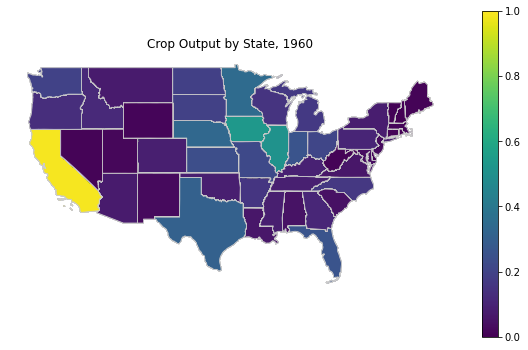

In [181]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Crop Output by State, 1960')
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([]) 
fig.colorbar(sm)
crops_l.plot(column='crop_output', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8')

In [182]:
crops_2000 = crops_l[crops_l['Year'] == 2000]
crops_2000

,Year,variable,crop_output,geometry
40,2000,AL,0.763403,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
85,2000,AR,2.859711,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."
130,2000,AZ,1.592129,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
175,2000,CA,22.039649,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
220,2000,CO,2.114670,"POLYGON ((-109.05996 38.49999, -109.05151 39.1..."
265,2000,CT,0.326116,"POLYGON ((-73.69594 41.11526, -73.48271 41.212..."
310,2000,DE,0.263059,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
355,2000,FL,6.102425,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ..."
400,2000,GA,2.415683,"POLYGON ((-85.60516 34.98468, -85.47434 34.983..."
445,2000,IA,10.232174,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."


In [185]:
crops_1970 = crops_l[crops_l['Year'] == 1970]
crops_1970

,Year,variable,crop_output,geometry
10,1970,AL,0.676867,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
55,1970,AR,1.656506,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."
100,1970,AZ,0.896517,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
145,1970,CA,8.832390,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
190,1970,CO,1.250153,"POLYGON ((-109.05996 38.49999, -109.05151 39.1..."
235,1970,CT,0.183244,"POLYGON ((-73.69594 41.11526, -73.48271 41.212..."
280,1970,DE,0.138412,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
325,1970,FL,2.778518,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ..."
370,1970,GA,1.271160,"POLYGON ((-85.60516 34.98468, -85.47434 34.983..."
415,1970,IA,5.486956,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."


In [187]:
crops_1980 = crops_l[crops_l['Year'] == 1980]
crops_1980

,Year,variable,crop_output,geometry
20,1980,AL,0.875171,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
65,1980,AR,1.692223,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."
110,1980,AZ,1.221880,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
155,1980,CA,14.389781,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
200,1980,CO,1.673125,"POLYGON ((-109.05996 38.49999, -109.05151 39.1..."
245,1980,CT,0.190731,"POLYGON ((-73.69594 41.11526, -73.48271 41.212..."
290,1980,DE,0.139793,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
335,1980,FL,4.613510,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ..."
380,1980,GA,1.489077,"POLYGON ((-85.60516 34.98468, -85.47434 34.983..."
425,1980,IA,8.854717,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."


<AxesSubplot:title={'center':'Crop Output by State, 1970'}>

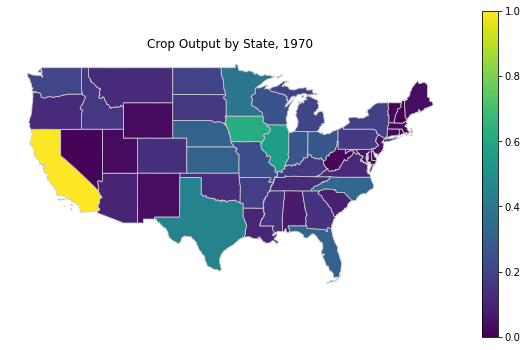

In [186]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Crop Output by State, 1970')
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([]) 
fig.colorbar(sm)
crops_1970.plot(column='crop_output', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'Crop Output by State, 1980'}>

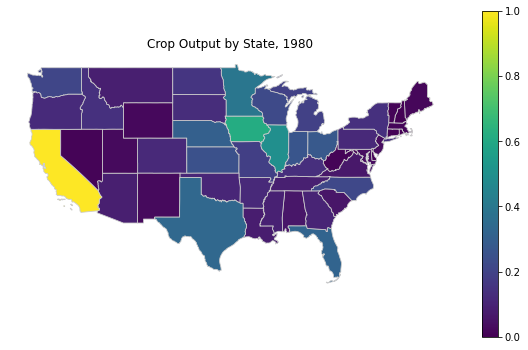

In [189]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Crop Output by State, 1980')
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([]) 
fig.colorbar(sm)
crops_1980.plot(column='crop_output', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'Crop Output by State, 1990'}>

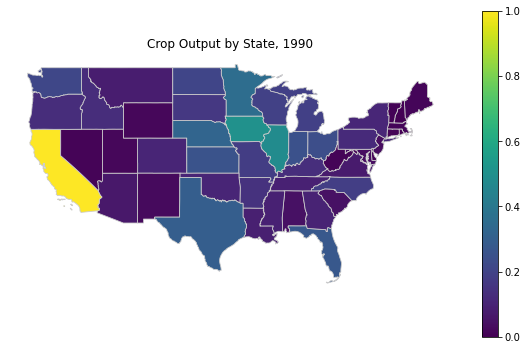

In [190]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Crop Output by State, 1990')
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([]) 
fig.colorbar(sm)
crops_1990.plot(column='crop_output', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8')

In [188]:
crops_1990 = crops_l[crops_l['Year'] == 1990]
crops_1990

,Year,variable,crop_output,geometry
30,1990,AL,0.803265,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
75,1990,AR,2.536384,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."
120,1990,AZ,1.144400,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
165,1990,CA,17.489463,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
210,1990,CO,1.823267,"POLYGON ((-109.05996 38.49999, -109.05151 39.1..."
255,1990,CT,0.232518,"POLYGON ((-73.69594 41.11526, -73.48271 41.212..."
300,1990,DE,0.223155,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
345,1990,FL,4.759074,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ..."
390,1990,GA,1.729382,"POLYGON ((-85.60516 34.98468, -85.47434 34.983..."
435,1990,IA,8.801647,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."


<AxesSubplot:title={'center':'Crop Output by State, 2000'}>

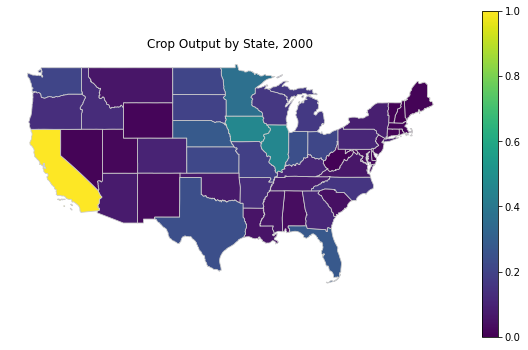

In [183]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Crop Output by State, 2000')
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([]) 
fig.colorbar(sm)
crops_2000.plot(column='crop_output', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8')

In [170]:
crops.columns

Index(['Year', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY'],
      dtype='object')

<AxesSubplot:title={'center':'Average Temperatures by State, 1970'}>

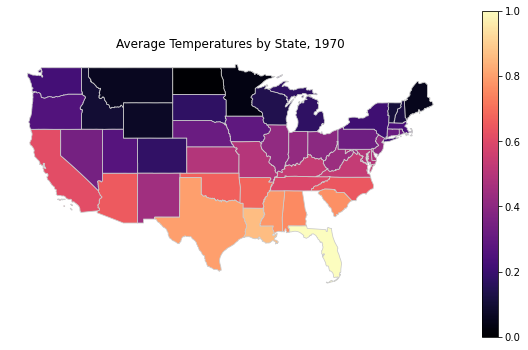

In [165]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Average Temperatures by State, 1970')
sm = plt.cm.ScalarMappable(cmap='magma')
sm.set_array([]) 
fig.colorbar(sm)
state_temp_1970.plot(column='AverageTemperature', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'Average Temperatures by State, 1980'}>

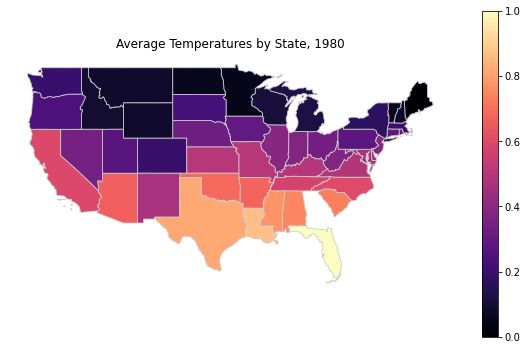

In [166]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Average Temperatures by State, 1980')
sm = plt.cm.ScalarMappable(cmap='magma')
sm.set_array([]) 
fig.colorbar(sm)
state_temp_1980.plot(column='AverageTemperature', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'Average Temperatures by State, 1990'}>

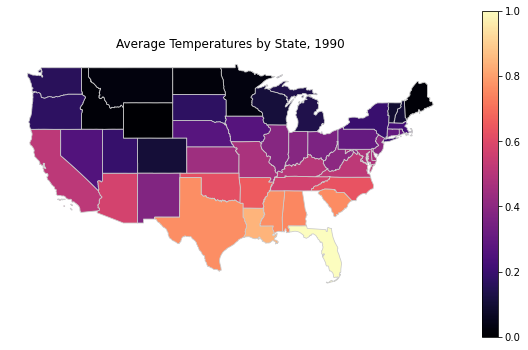

In [167]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Average Temperatures by State, 1990')
sm = plt.cm.ScalarMappable(cmap='magma')
sm.set_array([]) 
fig.colorbar(sm)
state_temp_1990.plot(column='AverageTemperature', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'Average Temperatures by State, 2000'}>

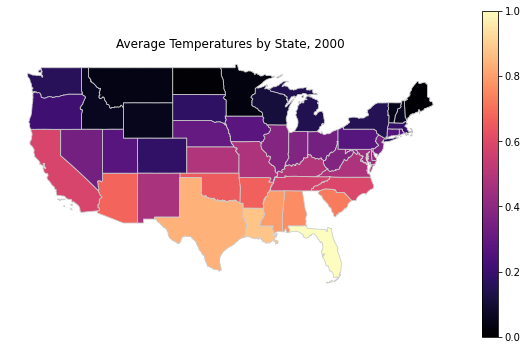

In [168]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Average Temperatures by State, 2000')
sm = plt.cm.ScalarMappable(cmap='magma')
sm.set_array([]) 
fig.colorbar(sm)
state_temp_2000.plot(column='AverageTemperature', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8')